In [147]:
import pandas as pd
import numpy as np

In [148]:
Prices_raw= pd.read_csv('../data/Prices.csv', encoding='utf-8',thousands=',')
Export_Import_raw = pd.read_csv('../data/Cross_Border.csv',encoding='utf-8',thousands=',')
Consumption_raw = pd.read_csv('../data/Cosumption.csv',encoding='utf-8',thousands=',')
Generation_raw = pd.read_csv('../data/Generation.csv',encoding='utf-8',thousands=',')

## Cleaning of the data 

In [149]:
Prices_raw['Start'] = Prices_raw['Unnamed: 0']
Consumption_raw['Start'] = Consumption_raw['Unnamed: 0']
Generation_raw['Start'] = Generation_raw['Unnamed: 0']
Export_Import_raw['Start'] = Export_Import_raw['Unnamed: 0']

In [150]:
Prices_raw['Start'] = pd.to_datetime(Prices_raw['Start'])
Prices_raw = Prices_raw.set_index('Start')
Export_Import_raw['Start'] = pd.to_datetime(Export_Import_raw['Start'])
Export_Import_raw = Export_Import_raw.set_index('Start')
Consumption_raw['Start'] = pd.to_datetime(Consumption_raw['Start'])
Consumption_raw = Consumption_raw.set_index('Start')
Generation_raw['Start'] = pd.to_datetime(Generation_raw['Start'])
Generation_raw = Generation_raw.set_index('Start')

In [151]:
Generation_raw.rename(inplace= True, columns={
    'Biomass [MWh] Original resolutions':'Biomass',
       'Hydropower [MWh] Original resolutions':'Hydropower',
       'Wind offshore [MWh] Original resolutions':'Wind_offshore',
       'Wind onshore [MWh] Original resolutions':'Wind_onshore',
       'Photovoltaics [MWh] Original resolutions':'Photovoltaics',
       'Other renewable [MWh] Original resolutions':'Other_renewable',
       'Nuclear [MWh] Original resolutions':'Nuclear',
       'Lignite [MWh] Original resolutions':'Lignite',
       'Hard coal [MWh] Original resolutions':'Hard_coal',
       'Fossil gas [MWh] Original resolutions':'Fossil_gas',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro_pumped_storage',
       'Other conventional [MWh] Original resolutions':'Other_conventional',
      'Sum [MWh]':'Generation_sum'
})



In [152]:
Consumption_raw.rename(inplace=True, columns={
    'Total (grid load) [MWh] Original resolutions':'Total_sum',
       'Residual load [MWh] Original resolutions':'Residual',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro'
})


In [153]:
Prices_raw.rename(inplace=True, columns={
    'Germany/Luxembourg [€/MWh] Calculated resolutions':'Germany_Luxembourg',
       'Belgium [€/MWh] Calculated resolutions':'Belgium',
       'France [€/MWh] Calculated resolutions':'France',
       'Austria [€/MWh] Calculated resolutions':'Austria',
       'Czech Republic [€/MWh] Calculated resolutions':'Czech_Republic',
       'Switzerland [€/MWh] Calculated resolutions':'Switzerland',
})

In [154]:
countries = ['Belgium', 'France', 'Poland', 'Austria', 'Czech Republic', 'Switzerland']
all_contries = countries + ['Netherlands', 'Denmark', 'Luxembourg', 'Sweden', 'Norway']

Export_Import_raw['Export_sum'] = 0
Export_Import_raw['Import_sum'] = 0

for country in countries:
    export_col = f'{country} (export) [MWh] Original resolutions'
    import_col = f'{country} (import) [MWh] Original resolutions'
    sum_col = f'{country.replace(" ", "_")}_sum'
    Export_Import_raw[sum_col] = Export_Import_raw[export_col] + Export_Import_raw[import_col]



for contries in all_contries:
    export_cols = f'{contries} (export) [MWh] Original resolutions'
    import_cols = f'{contries} (import) [MWh] Original resolutions'

    Export_Import_raw['Export_sum'] += Export_Import_raw[export_cols]
    Export_Import_raw['Import_sum'] += Export_Import_raw[import_cols]

# Calculate the remainder sum
export_import_sums = [f'{country.replace(" ", "_")}_sum' for country in countries]
Export_Import_raw['Remainder_sum'] = Export_Import_raw['Sum [MWh]'] - Export_Import_raw[export_import_sums].sum(axis=1)


In [155]:
Export_Import_raw.rename(inplace=True, columns={
    'Sum [MWh]':'Export_Import_sum'
})

Drop the other columns: 


In [156]:
Generation = Generation_raw.drop(columns=['Unnamed: 0','End date'])
Consumption = Consumption_raw.drop(columns= ['Unnamed: 0','End date'])
Prices = Prices_raw.drop(columns=
        ['Unnamed: 0','End date','Denmark 1 [€/MWh] Calculated resolutions',
       'Denmark 2 [€/MWh] Calculated resolutions',
       'Netherlands [€/MWh] Calculated resolutions',
       'Norway 2 [€/MWh] Calculated resolutions',
       'Sweden 4 [€/MWh] Calculated resolutions', 
       'Northern Italy [€/MWh] Calculated resolutions',
       'Slovenia [€/MWh] Calculated resolutions',
       'Hungary [€/MWh] Calculated resolutions'
       ])
Export_Import = Export_Import_raw.drop(columns=
        ['Unnamed: 0','End date', 'Netherlands (export) [MWh] Original resolutions',
       'Netherlands (import) [MWh] Original resolutions',
       'Switzerland (export) [MWh] Original resolutions',
       'Switzerland (import) [MWh] Original resolutions',
       'Denmark (export) [MWh] Original resolutions',
       'Denmark (import) [MWh] Original resolutions',
       'Czech Republic (export) [MWh] Original resolutions',
       'Czech Republic (import) [MWh] Original resolutions',
       'Luxembourg (export) [MWh] Original resolutions',
       'Luxembourg (import) [MWh] Original resolutions',
       'Sweden (export) [MWh] Original resolutions',
       'Sweden (import) [MWh] Original resolutions',
       'Austria (export) [MWh] Original resolutions',
       'Austria (import) [MWh] Original resolutions',
       'France (export) [MWh] Original resolutions',
       'France (import) [MWh] Original resolutions',
       'Poland (export) [MWh] Original resolutions',
       'Poland (import) [MWh] Original resolutions',
       'Norway (export) [MWh] Original resolutions',
       'Norway (import) [MWh] Original resolutions',
       'Belgium (export) [MWh] Original resolutions',
       'Belgium (import) [MWh] Original resolutions'
       ])

In [157]:
Import_Export = Export_Import*-1

Import_Export.rename(columns={'Export_Import_sum':'Import_Export_sum'}, inplace=True)
Generation = pd.concat([Generation,Import_Export], axis=1)

In [158]:
Generation['Total_sum'] = Generation['Generation_sum']+Generation['Import_Export_sum']

## Data Overview

| Generation           |       | Consumption          |       | Prices             |         | Export_Import (+/-)**    |       |
|----------------------|-------|----------------------|-------|--------------------|---------|-----------------|-------|
|                      |       |                      |       |                    |         |                 |       |
| Column               | Unit  | Column               | Unit  | Column             | Unit    | Column         | Unit  |
| Biomass              | [MWh] | Total_sum                | [MWh] | Germany_Luxembourg | [€/MWh] | Export_Import_sum             | [MWh] |
| Hydropower           | [MWh] | Residual             | [MWh] | Belgium            | [€/MWh] | Belgium_sum     | [MWh] |
| Wind_offshore        | [MWh] | Hydro_pumped_storage | [MWh] | France             | [€/MWh] | France_sum      | [MWh] |
| Wind_onshore         | [MWh] |                      |       | Austria             | [€/MWh] | Poland_sum      | [MWh] |
| Photovoltaics        | [MWh] |                      |       | Switzerland            | [€/MWh] | Austrian_sum    | [MWh] |
| Other_renewable      | [MWh] |                      |       | Czech_Republic       | [€/MWh] | Switzerland_sum | [MWh] |
| Nuclear              | [MWh] |                      |       |      |  |Czech_Republic_sum| [MWh] |
| Lignite              | [MWh] |                      |       |                    |         | Export_sum                | [MWh]      |
| Hard_coal            | [MWh] |                      |       |                    |         | Import_sum                |  [MWh]     |
| Fossil_gas           | [MWh] |                      |       |                    |         |                 |       |
| Hydro_pumped_storage | [MWh] |                      |       |                    |         |                 |       |
| Other_conventional   | [MWh] |                      |       |                    |         |                 |       |
| Generation_sum                  | [MWh] |                      |       |                    |         |                 |       |
| Import_Export_sum*   | [MWh] |                      |       |                    |         |                 |       |
| Belgium_sum   | [MWh] |                      |       |                    |         |                 |       |
| Export_sum   | [MWh] |                      |       |                    |         |                 |       |
| Import_sum   | [MWh] |                      |       |                    |         |                 |       |
| France_sum   | [MWh] |                      |       |                    |         |                 |       |
| Poland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Austrian_sum   | [MWh] |                      |       |                    |         |                 |       |
| Switzerland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Chzech_Republic_sum   | [MWh] |                      |       |                    |         |                 |       |
| Total_sum   | [MWh] |                      |       |                    |         |                 |       |
|    |  |                      |       |                    |         |                 |       |
| *Import_Export_sum   | = | Export_Import_sum x (-1)                     |       |                    |         | **Exports are positive, Imports negative       |       |
| All country sums are inverted   |  |                      |       |                    |         |                 |       |

## EDA

## Trend-Seasonal Decomposition

In [159]:
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot


def decomposition_df(df, column, frequency='MS',aggregation_method='sum', type='additive'):
    '''
    Process a dataframe to decompose its time series data and add trend, seasonal, residual, and trend+seasonal columns.
    
    Parameters:
    - df: pandas DataFrame containing the data to be processed
    - column: the column to be processed in the dataframe
    - frequency: the frequency of the decomposition, default monthly 
        - D - daily
        - h- hourly
        - W- weekly 

        look here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
    -aggregation_method: the method of the decomposition, default sum
        -mean
        -min
        -max


    -type: the used model in the decomposition, default = additive
        - multiplicative 
    
    
    Returns:
    - df_Frequency: the processed DataFrame with additional columns
    '''
    aggregation_func = getattr(pd.DataFrame, aggregation_method)
    df_Frequency=df[[column]].resample(frequency).apply(aggregation_func)
    decompositon= seasonal_decompose(df_Frequency[column], model=type)


    df_Frequency['Trend'] = decompositon.trend
    df_Frequency['Seasonal'] = decompositon.seasonal
    df_Frequency['Residual'] = decompositon.resid
    df_Frequency['Trend+Seasonal'] = df_Frequency['Seasonal'] + df_Frequency['Trend']

    return df_Frequency


In [160]:
Prices_GER_monthly = decomposition_df(Prices, 'Germany_Luxembourg','MS','mean')
Prices_GER_weekly = decomposition_df(Prices,'Germany_Luxembourg','W', 'mean')
# Prices_GER_daily = decomposition_df(Prices,'Germany_Luxembourg', 'D','mean')
# Prices_GER_hourly = decomposition_df(Prices,'Germany_Luxembourg','h','mean')


Generation_monthly = decomposition_df(Generation,'Generation_sum')
Generation_weekly = decomposition_df(Generation,'Generation_sum','W')
# Generation_daily = decomposition_df(Generation,'Generation_sum','D')
# Generation_hourly = decomposition_df(Generation,'Generation_sum','h')

Consumption_monthly = decomposition_df(Consumption, 'Total_sum')
Consumption_weekly = decomposition_df(Consumption,'Total_sum','W')
# Consumption_daily = decomposition_df(Consumption,'Total_sum', 'D')
# Consumption_hourly = decomposition_df(Consumption,'Total_sum','h')

Export_Import_monthly = decomposition_df(Export_Import, 'Export_Import_sum')
Export_Import_weekly = decomposition_df(Export_Import,'Export_Import_sum','W')
# Export_Import_daily = decomposition_df(Export_Import,'Export_Import_sum', 'D')
# Export_Import_hourly = decomposition_df(Export_Import,'Export_Import_sum','h')

In [161]:
Prices_FRA_monthly = decomposition_df(Prices, 'France', 'W', 'mean')
Prices_Austria_monthly = decomposition_df(Prices, 'Austria', 'W', 'mean')
Prices_Switzerland_monthly = decomposition_df(Prices, 'Switzerland', 'W', 'mean')
Prices_Belgium_monthly = decomposition_df(Prices, 'Belgium', 'W', 'mean')
Prices_Czech_Republic_monthly = decomposition_df(Prices, 'Czech_Republic', 'W', 'mean')

In [162]:
Prices.to_csv('../data/Prices_clean.csv', index= True)
Export_Import.to_csv('../data/Export_Import_clean.csv', index= True)
Consumption.to_csv('../data/Cosumption_clean.csv', index= True)
Generation.to_csv('../data/Generation_clean.csv', index= True)

Generation_monthly.to_csv('../data/Generation_monthly.csv', index= True)
Generation_weekly.to_csv('../data/Generation_weekly.csv', index= True)

Consumption_monthly.to_csv('../data/Consumption_monthly.csv', index= True)
Consumption_weekly.to_csv('../data/Consumption_weekly.csv', index= True)

Export_Import_monthly.to_csv('../data/Export_Import_monthly.csv', index= True)
Export_Import_weekly.to_csv('../data/Export_Import_weekly.csv', index= True)

Prices_FRA_monthly.to_csv('../data/Prices_FRA_weekly.csv', index=True)
Prices_Austria_monthly.to_csv('../data/Prices_Austria_weekly.csv', index=True)
Prices_Switzerland_monthly.to_csv('../data/Prices_Switzerland_weekly.csv', index=True)
Prices_Belgium_monthly.to_csv('../data/Prices_Belgium_weekly.csv', index=True)
Prices_Czech_Republic_monthly.to_csv('../data/Prices_Czech_Republic_weekly.csv', index=True)

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.rcParams.update({'font.size': 13})

### Price

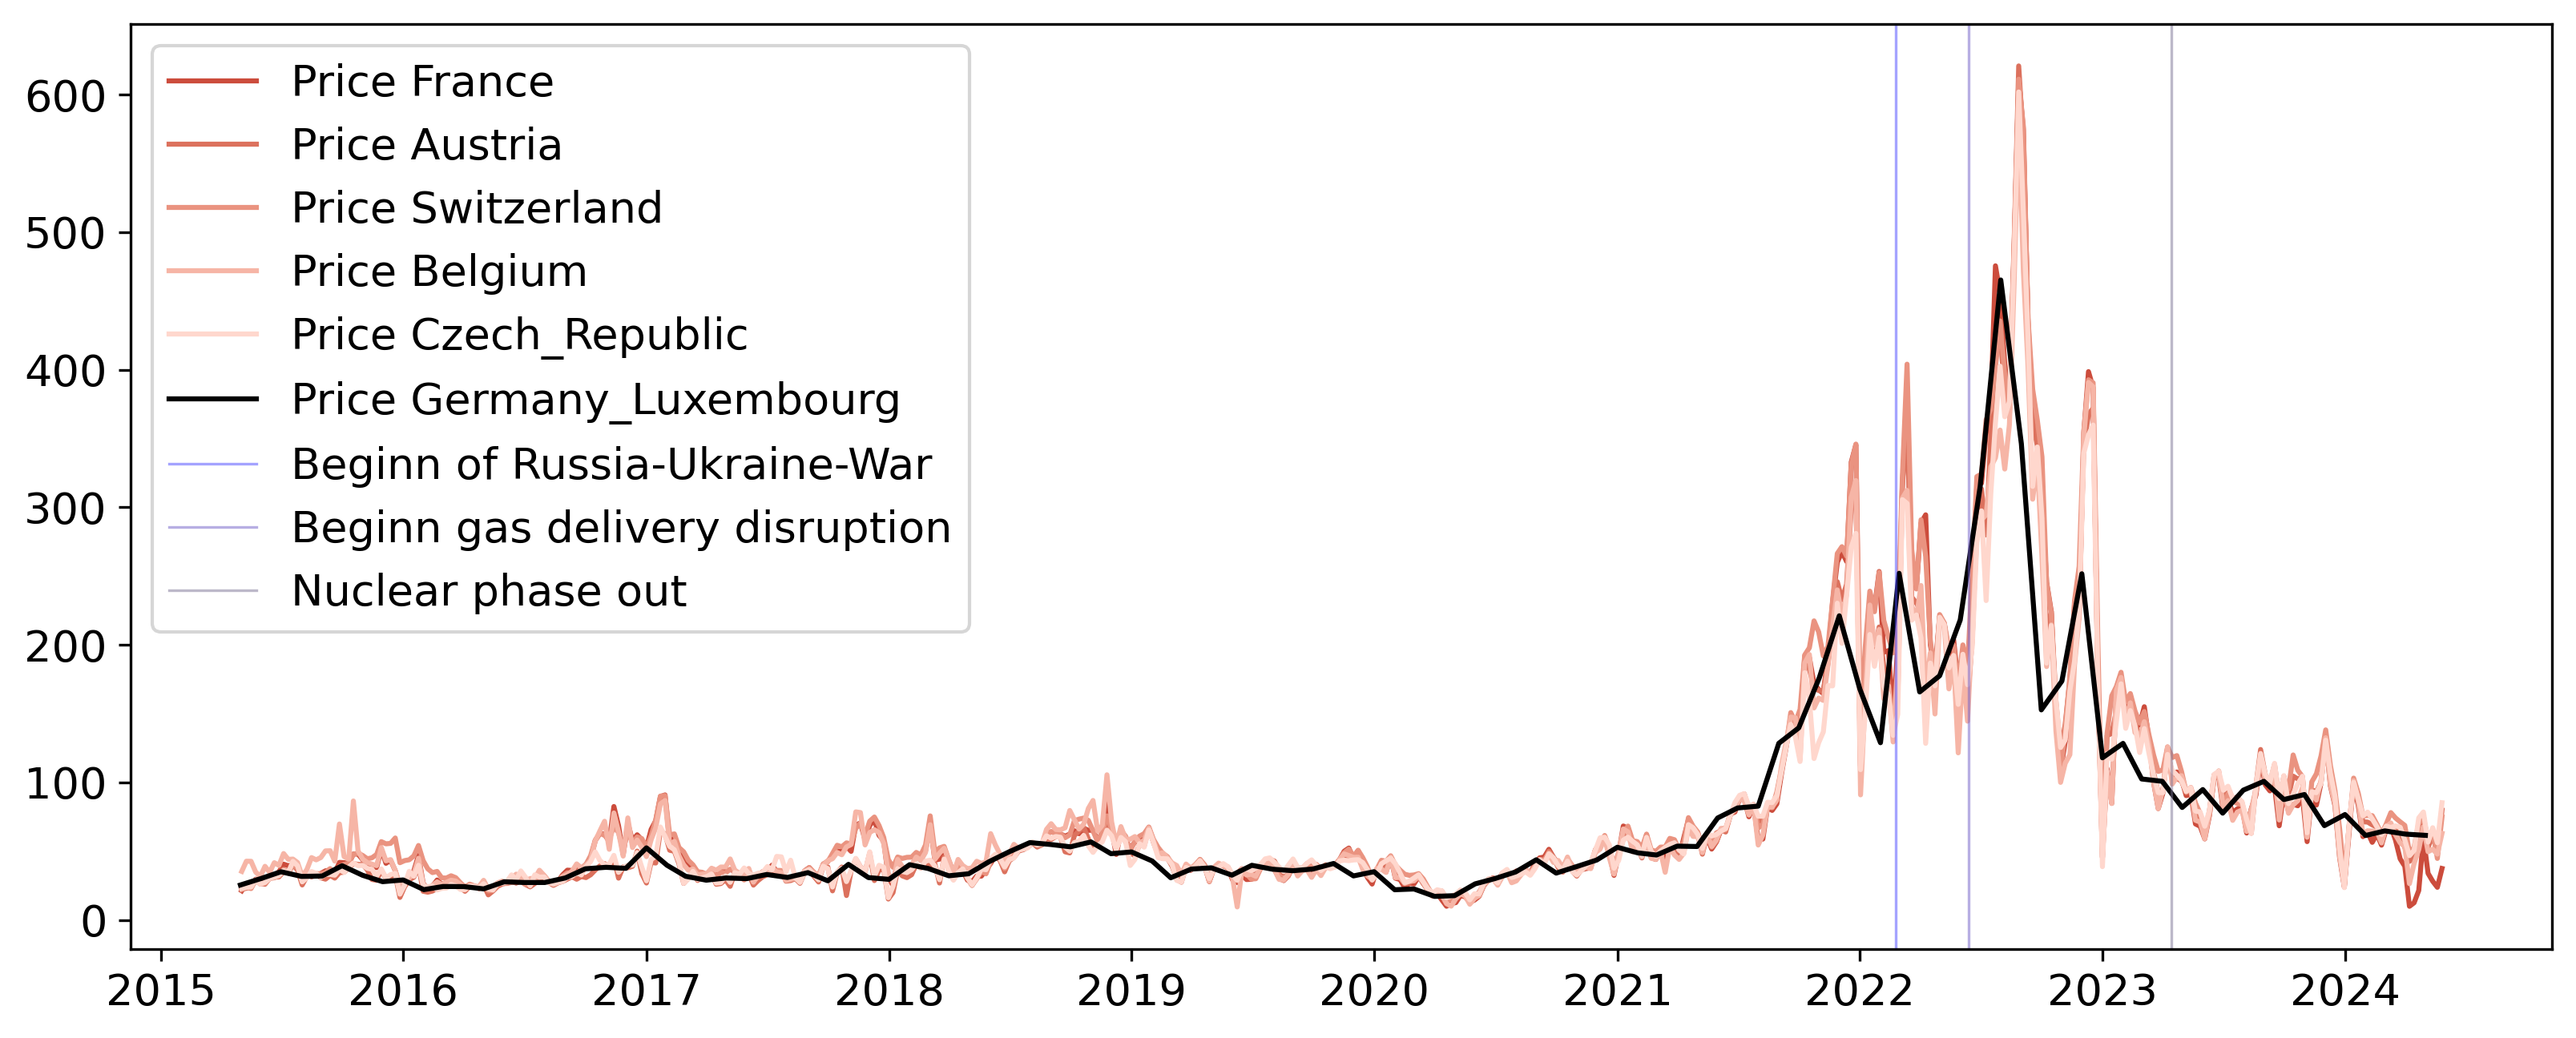

In [164]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_FRA_monthly['France'], label = 'Price France',color='#cc4c3c')
plt.plot(Prices_Austria_monthly['Austria'], label = 'Price Austria', color='#dc715d')
plt.plot(Prices_Switzerland_monthly['Switzerland'], label = 'Price Switzerland', color='#ea9380')
plt.plot(Prices_Belgium_monthly['Belgium'], label = 'Price Belgium', color='#f6b5a6')
plt.plot(Prices_Czech_Republic_monthly['Czech_Republic'], label = 'Price Czech_Republic', color='#ffd7cd')
plt.plot(Prices_GER_monthly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#000000')

plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


#### Inflation Adjustment

In [165]:
Inflation_data = pd.read_csv('../data/prc_hicp_midx__custom_11891216_linear.csv')

Inflation_data['coicop'].replace('CP00', 'All-items', inplace=True)
Inflation_data['coicop'].replace('CP0451', 'Electricity', inplace=True)
Inflation_data['coicop'].replace('ELC_GAS', 'Electricity_gas_solid_fuels_heat_energy', inplace=True)

In [166]:
Inflation_data=Inflation_data.drop(index=[0,1,111,112, 222,223]) #deleting of the month march and april for all 3 categories to adjust them with our price data, note index based on Januar 2015

In [167]:
Inflation_monthly = Inflation_data.loc[:,['coicop','TIME_PERIOD','OBS_VALUE']]

Inflation_monthly['TIME_PERIOD'] = pd.to_datetime(Inflation_monthly['TIME_PERIOD'], format='%Y-%m')
Inflation_monthly.set_index('TIME_PERIOD', inplace=True)

Inflation_monthly_all_items = Inflation_monthly.loc[Inflation_monthly['coicop'] == 'All-items']
Inflation_monthly_electricity = Inflation_monthly.loc[Inflation_monthly['coicop'] == 'Electricity']

In [168]:
Inflation_monthly_electricity= Inflation_monthly_electricity.drop(columns='coicop')
Inflation_monthly_all_items= Inflation_monthly_all_items.drop(columns='coicop')

In [169]:
Inflation_weekly_electricity = Inflation_monthly_electricity.resample('W').ffill()
Inflation_weekly_all_items = Inflation_monthly_all_items.resample('W').ffill()

In [170]:
new_rows = pd.DataFrame(data={'OBS_VALUE':[151.27,151.27,151.27], 'TIME_PERIOD':['2024-05-12','2024-05-19','2024-05-26']})
new_rows['TIME_PERIOD'] = pd.to_datetime(new_rows['TIME_PERIOD'])
new_rows= new_rows.set_index('TIME_PERIOD')

In [171]:
new_rows2 = pd.DataFrame(data={'OBS_VALUE':[126.31,126.31,126.31], 'TIME_PERIOD':['2024-05-12','2024-05-19','2024-05-26']})
new_rows2['TIME_PERIOD'] = pd.to_datetime(new_rows2['TIME_PERIOD'])
new_rows2= new_rows2.set_index('TIME_PERIOD')

In [172]:
Inflation_weekly_electricity = pd.concat([Inflation_weekly_electricity, new_rows], axis=0)
Inflation_weekly_all_items = pd.concat([Inflation_weekly_all_items, new_rows2], axis=0)

In [173]:
Inflation_weekly_electricity.to_csv('../data/Inflation_weekly_electricity.csv', index= True)
Inflation_monthly_electricity.to_csv('../data/Inflation_monthly_electricity.csv', index= True)

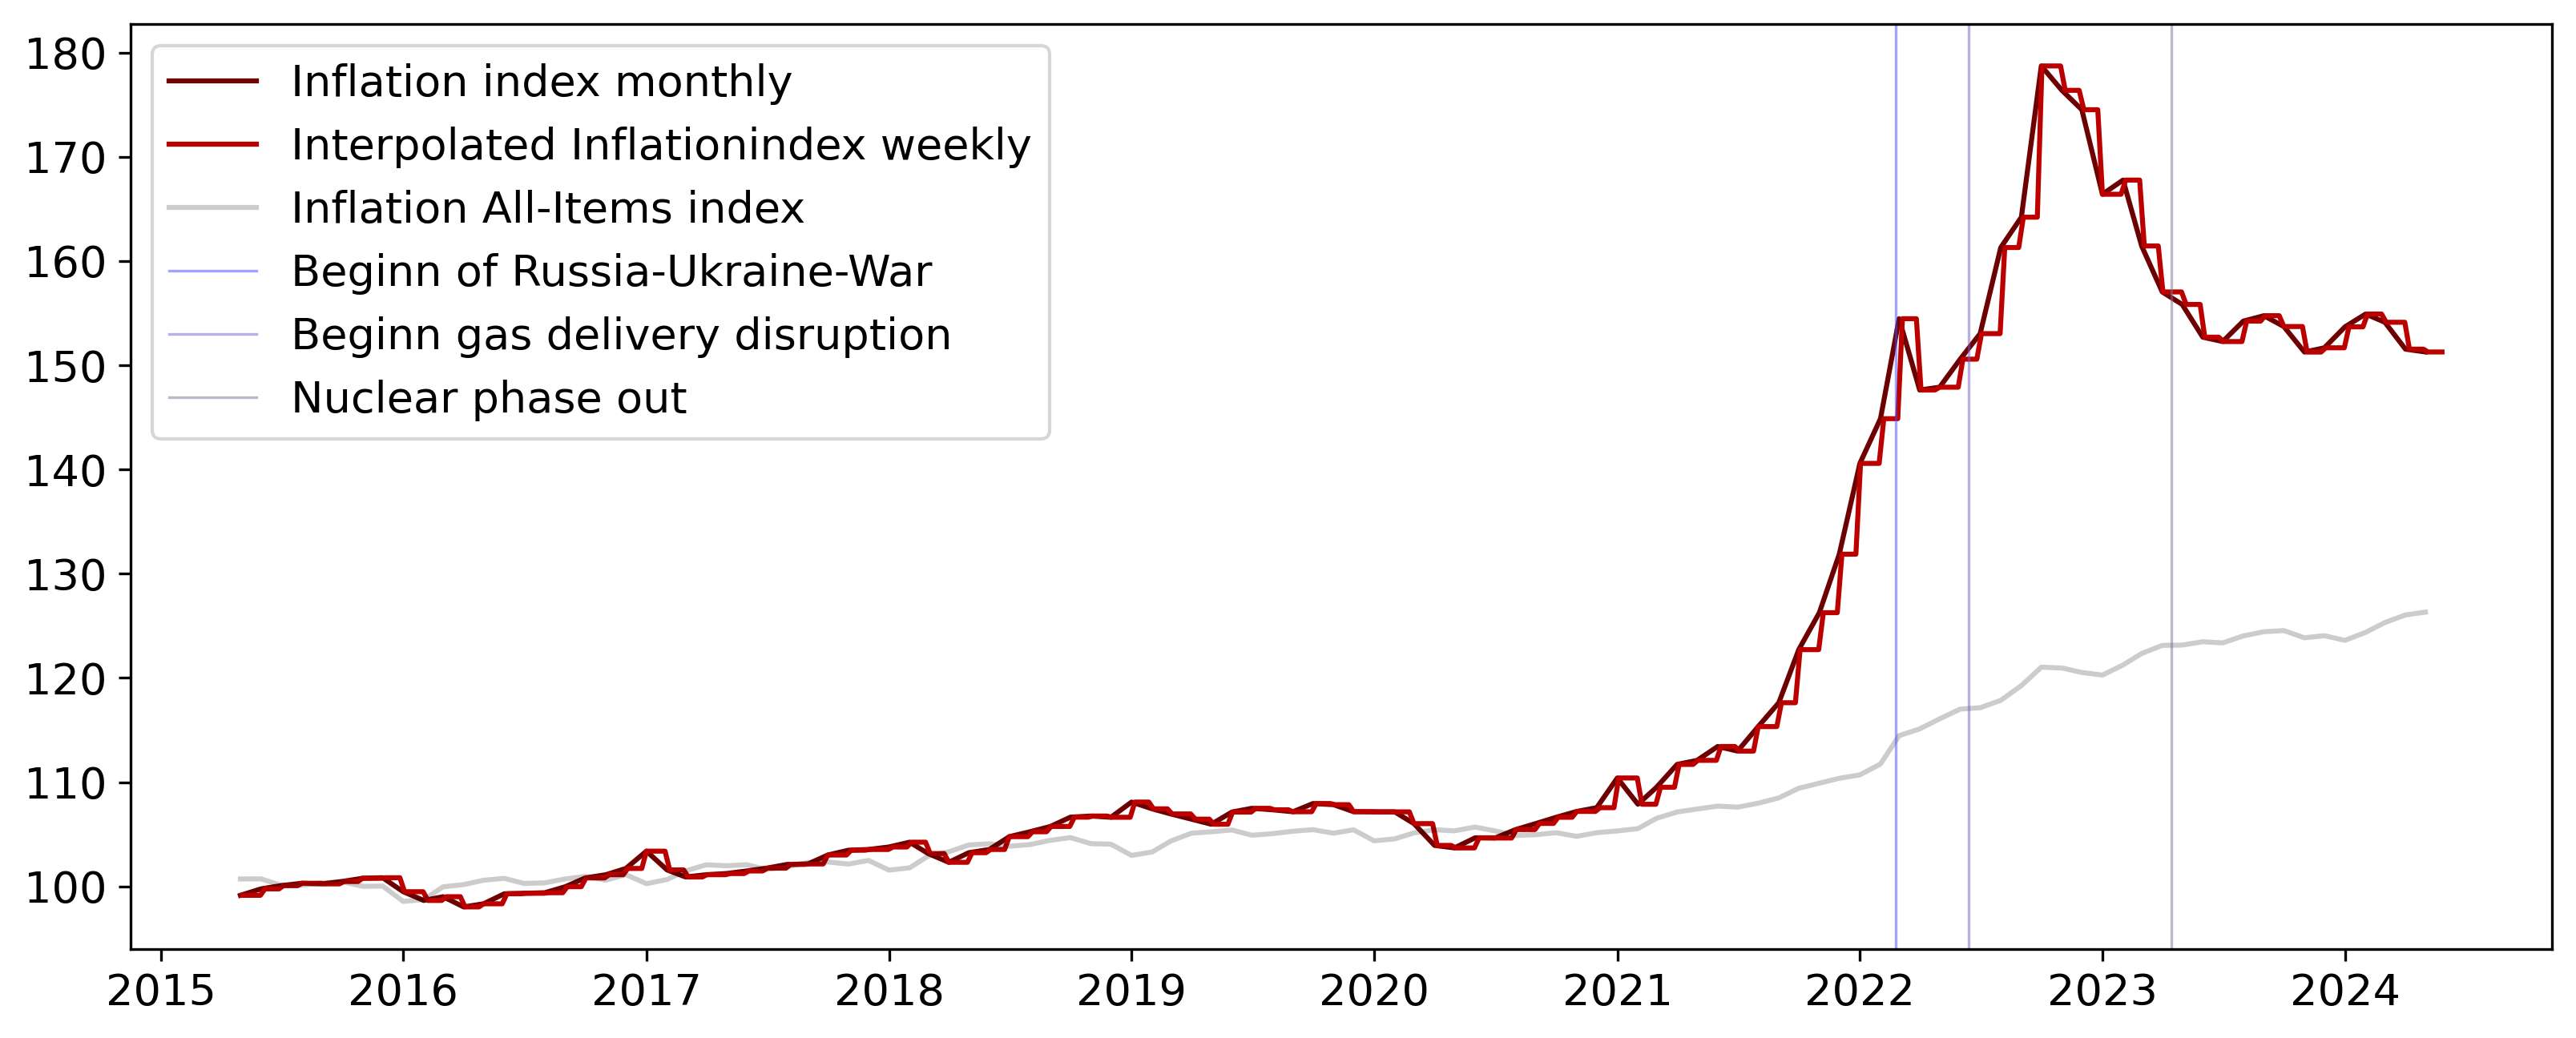

In [174]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Inflation_monthly_electricity['OBS_VALUE'], label = 'Inflation index monthly', color = '#6d0000')
plt.plot(Inflation_weekly_electricity['OBS_VALUE'], label = 'Interpolated Inflationindex weekly',color='#bc0000')

plt.plot(Inflation_monthly_all_items['OBS_VALUE'], label = 'Inflation All-Items index',color='#000000', alpha = .2)
# plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#000000')




plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

In [175]:
Prices_GER_weekly['Germany_Luxembourg_adjusted'] = Prices_GER_weekly['Germany_Luxembourg'] / Inflation_weekly_electricity['OBS_VALUE'] *100

In [176]:
Prices_GER_monthly['Germany_Luxembourg_adjusted'] = Prices_GER_monthly['Germany_Luxembourg'] / Inflation_monthly_electricity['OBS_VALUE'] *100

In [177]:
decompositon= seasonal_decompose(Prices_GER_weekly['Germany_Luxembourg_adjusted'], model='additive')

Prices_GER_weekly['Trend_adjusted'] = decompositon.trend
Prices_GER_weekly['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_weekly['Residual_adjusted'] = decompositon.resid
Prices_GER_weekly['Trend+Seasonal_adjusted'] = Prices_GER_weekly['Seasonal_adjusted'] + Prices_GER_weekly['Trend_adjusted']


In [178]:
decompositon= seasonal_decompose(Prices_GER_monthly['Germany_Luxembourg_adjusted'], model='additive')

Prices_GER_monthly['Trend_adjusted'] = decompositon.trend
Prices_GER_monthly['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_monthly['Residual_adjusted'] = decompositon.resid
Prices_GER_monthly['Trend+Seasonal_adjusted'] = Prices_GER_monthly['Seasonal_adjusted'] + Prices_GER_monthly['Trend_adjusted']

In [179]:
Prices_GER_monthly.to_csv('../data/Prices_GER_monthly.csv', index= True)
Prices_GER_weekly.to_csv('../data/Prices_GER_weekly.csv', index= True)

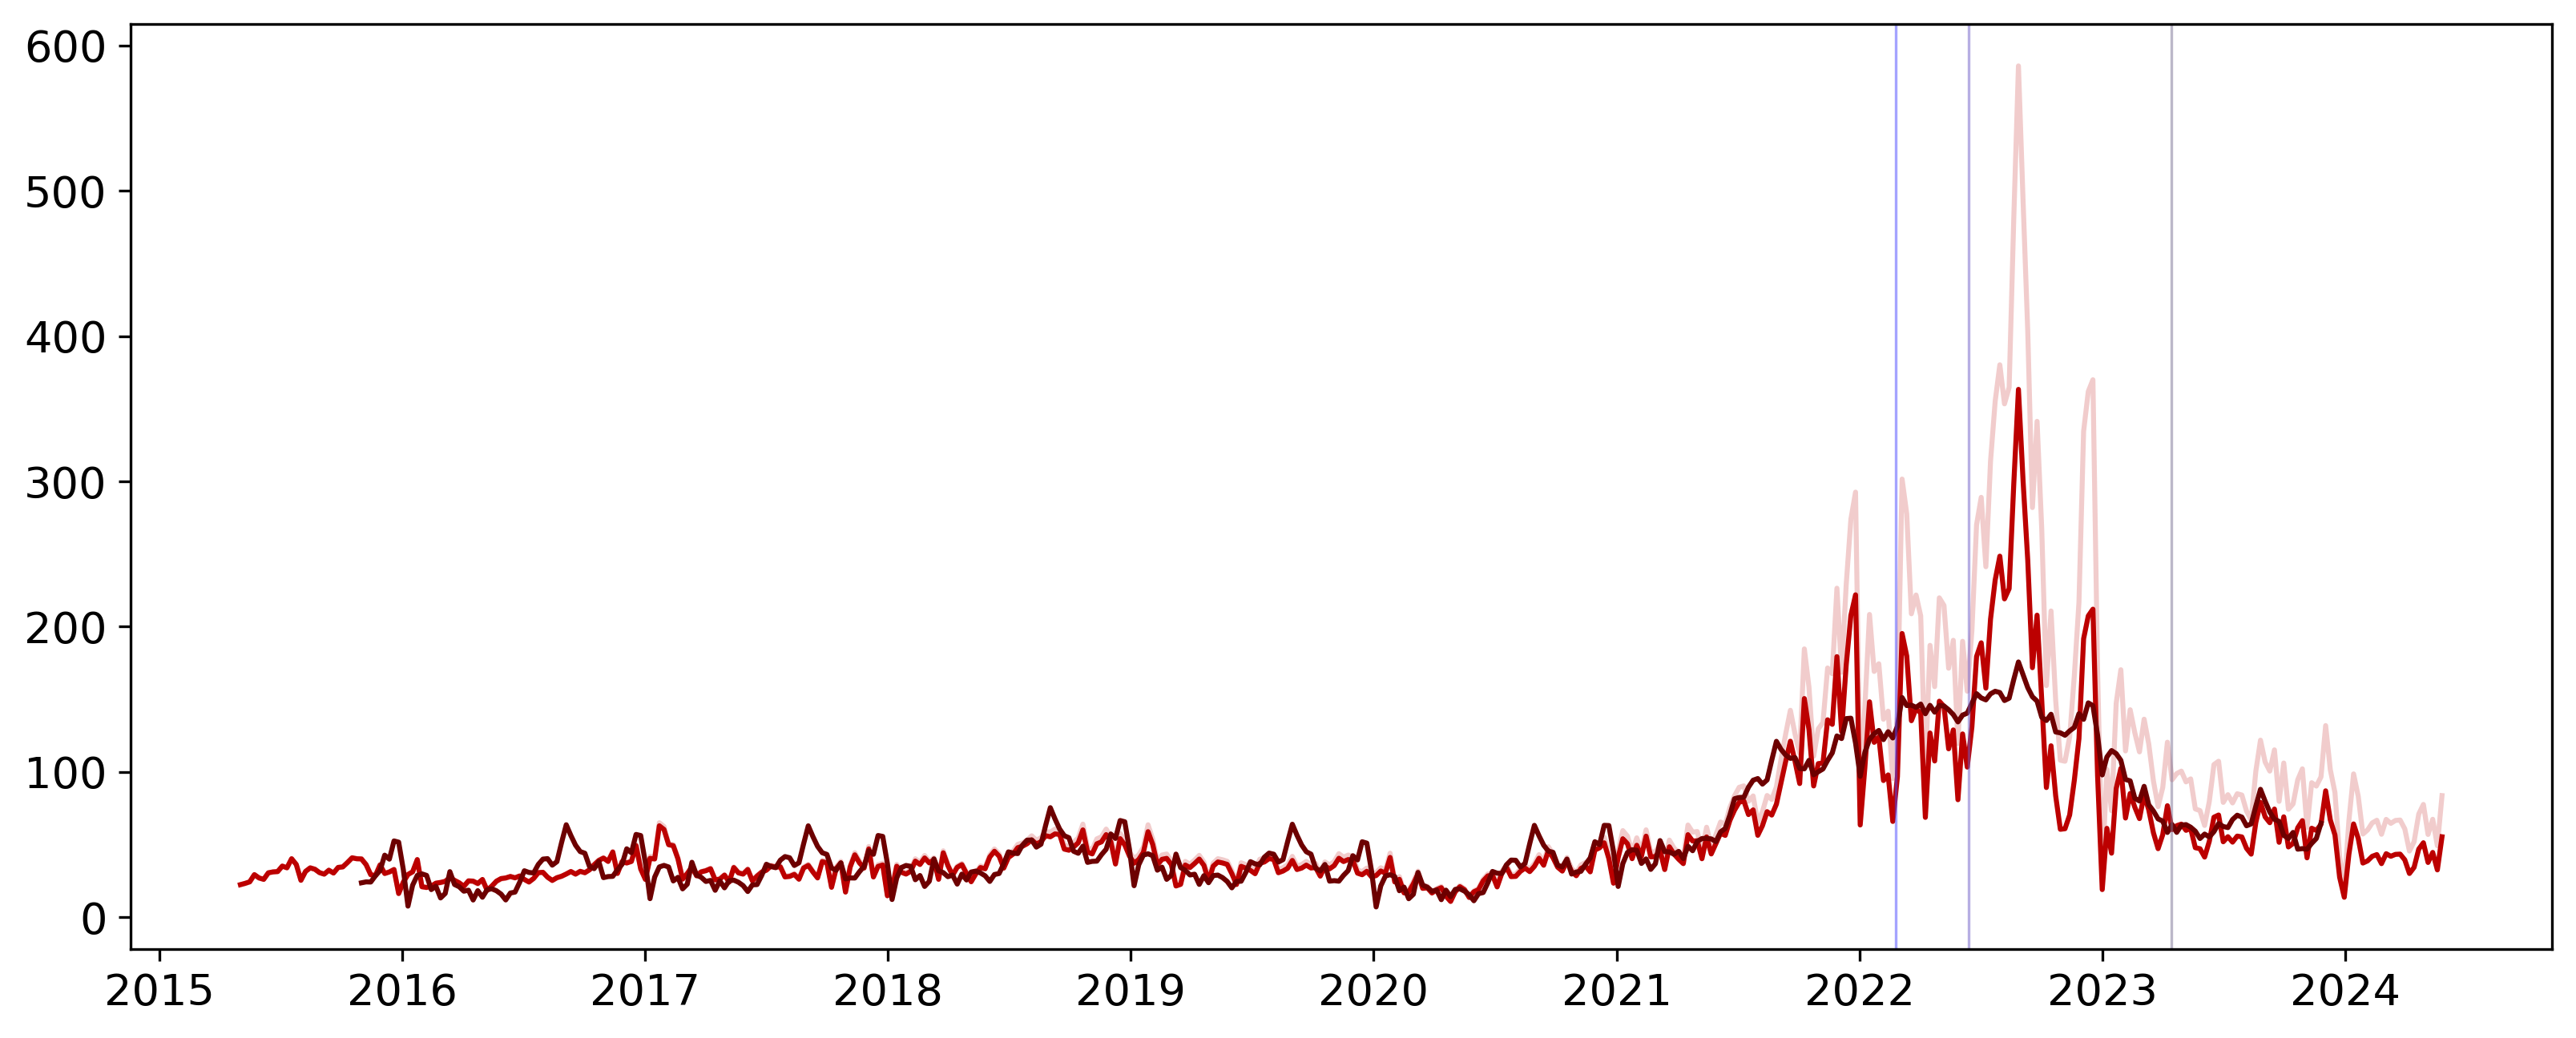

In [205]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#bc0000', alpha =.2)
plt.plot(Prices_GER_weekly['Germany_Luxembourg_adjusted'], label = 'Price Germany_Luxembourg inflation adjusted',color='#bc0000')
plt.plot(Prices_GER_weekly['Trend+Seasonal_adjusted'], label = 'Trend + Seasonal inflation adjusted Germany_Luxembourg', color = '#6d0000')






plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

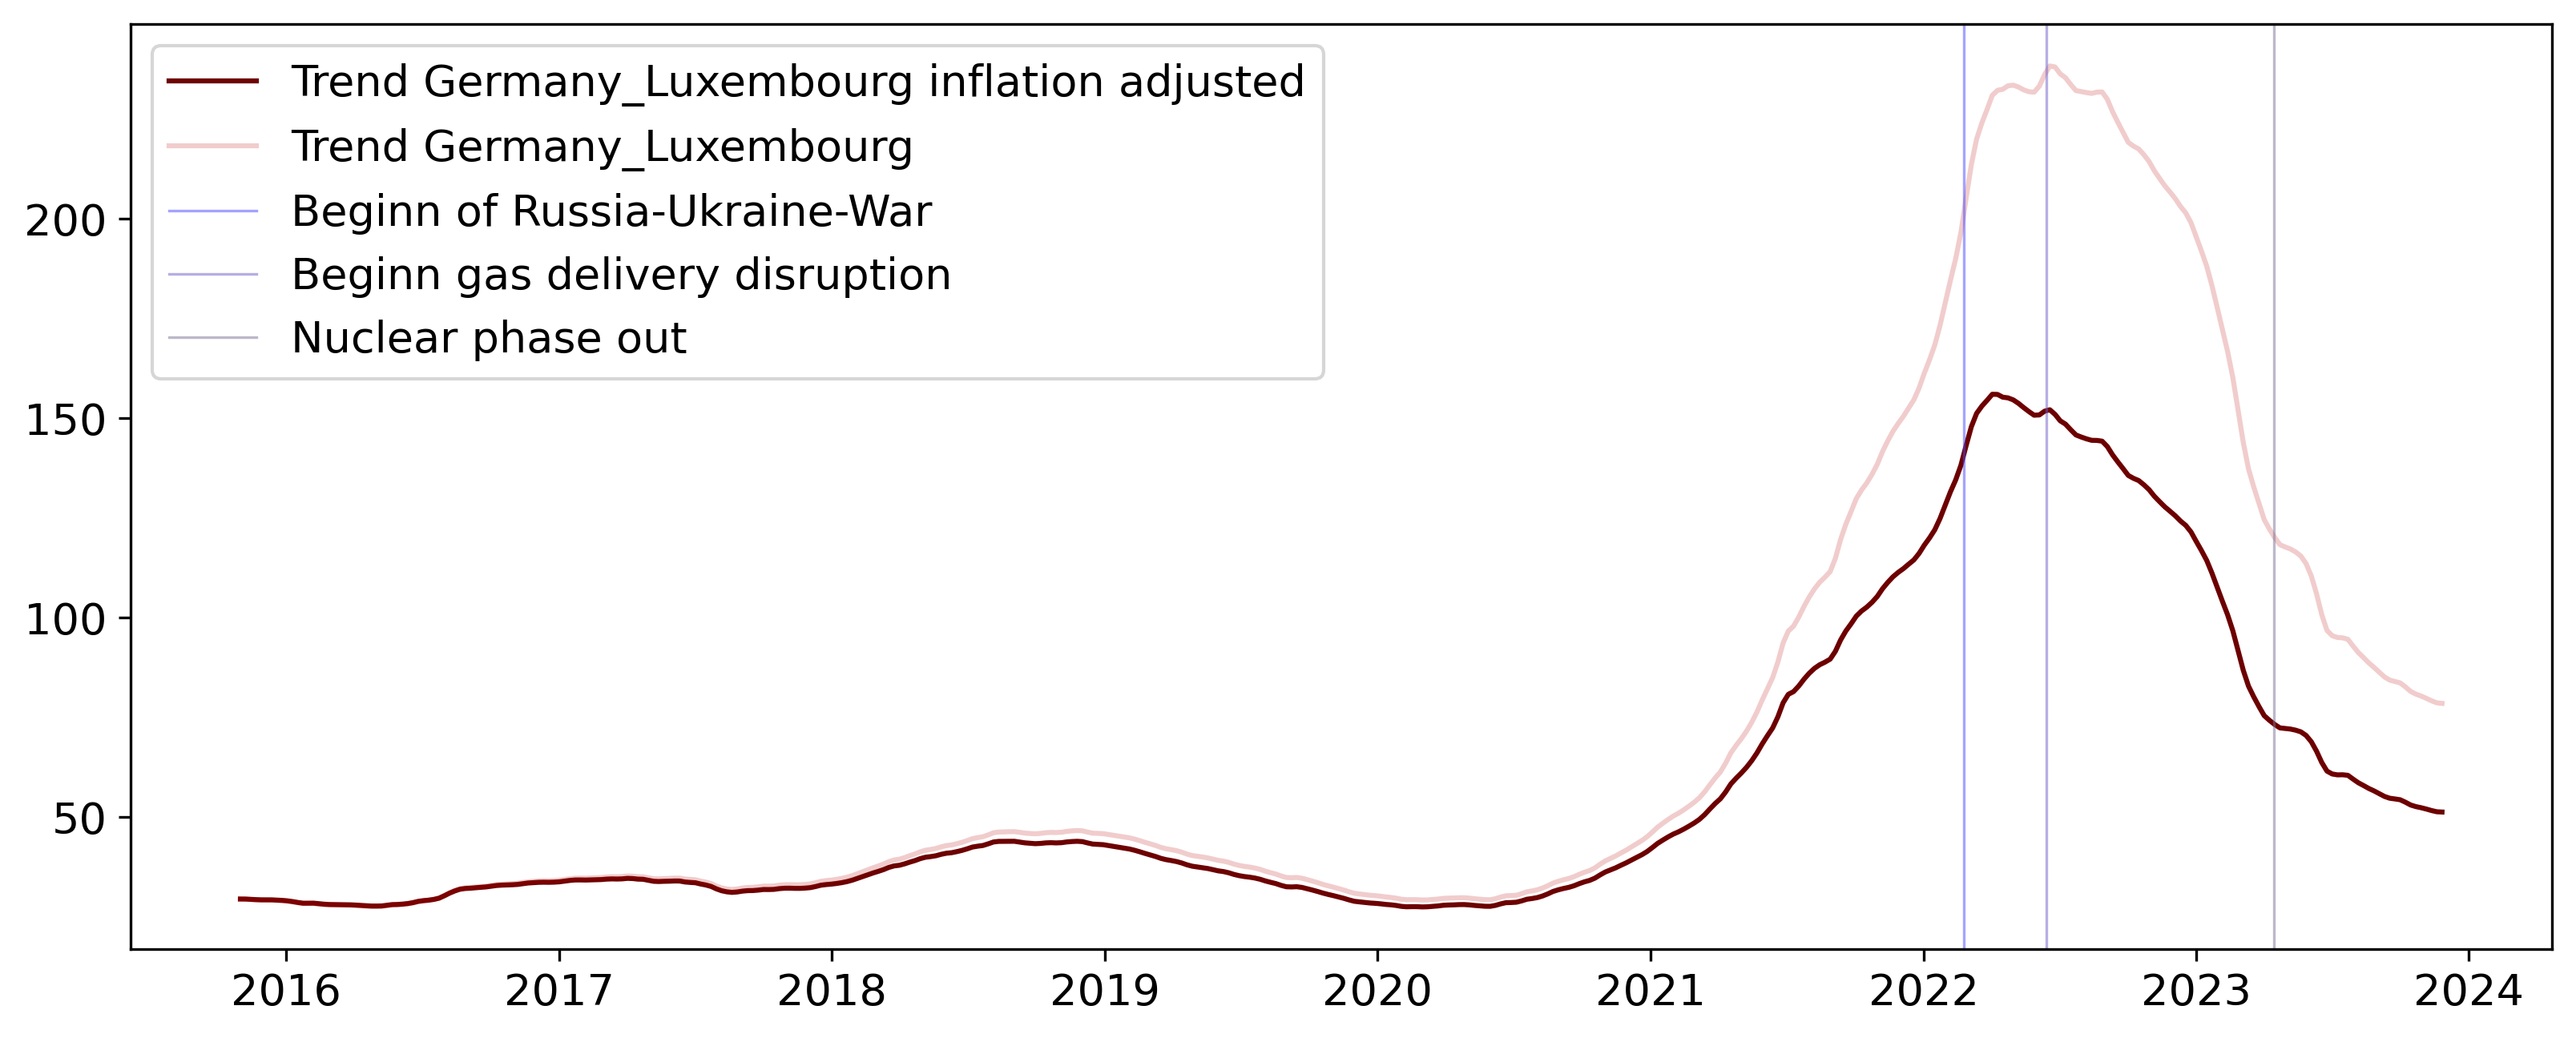

In [200]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Trend_adjusted'], label = 'Trend Germany_Luxembourg inflation adjusted', color = '#6d0000')
plt.plot(Prices_GER_weekly['Trend'], label = 'Trend Germany_Luxembourg', color = '#bc0000' ,alpha = .2)




plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

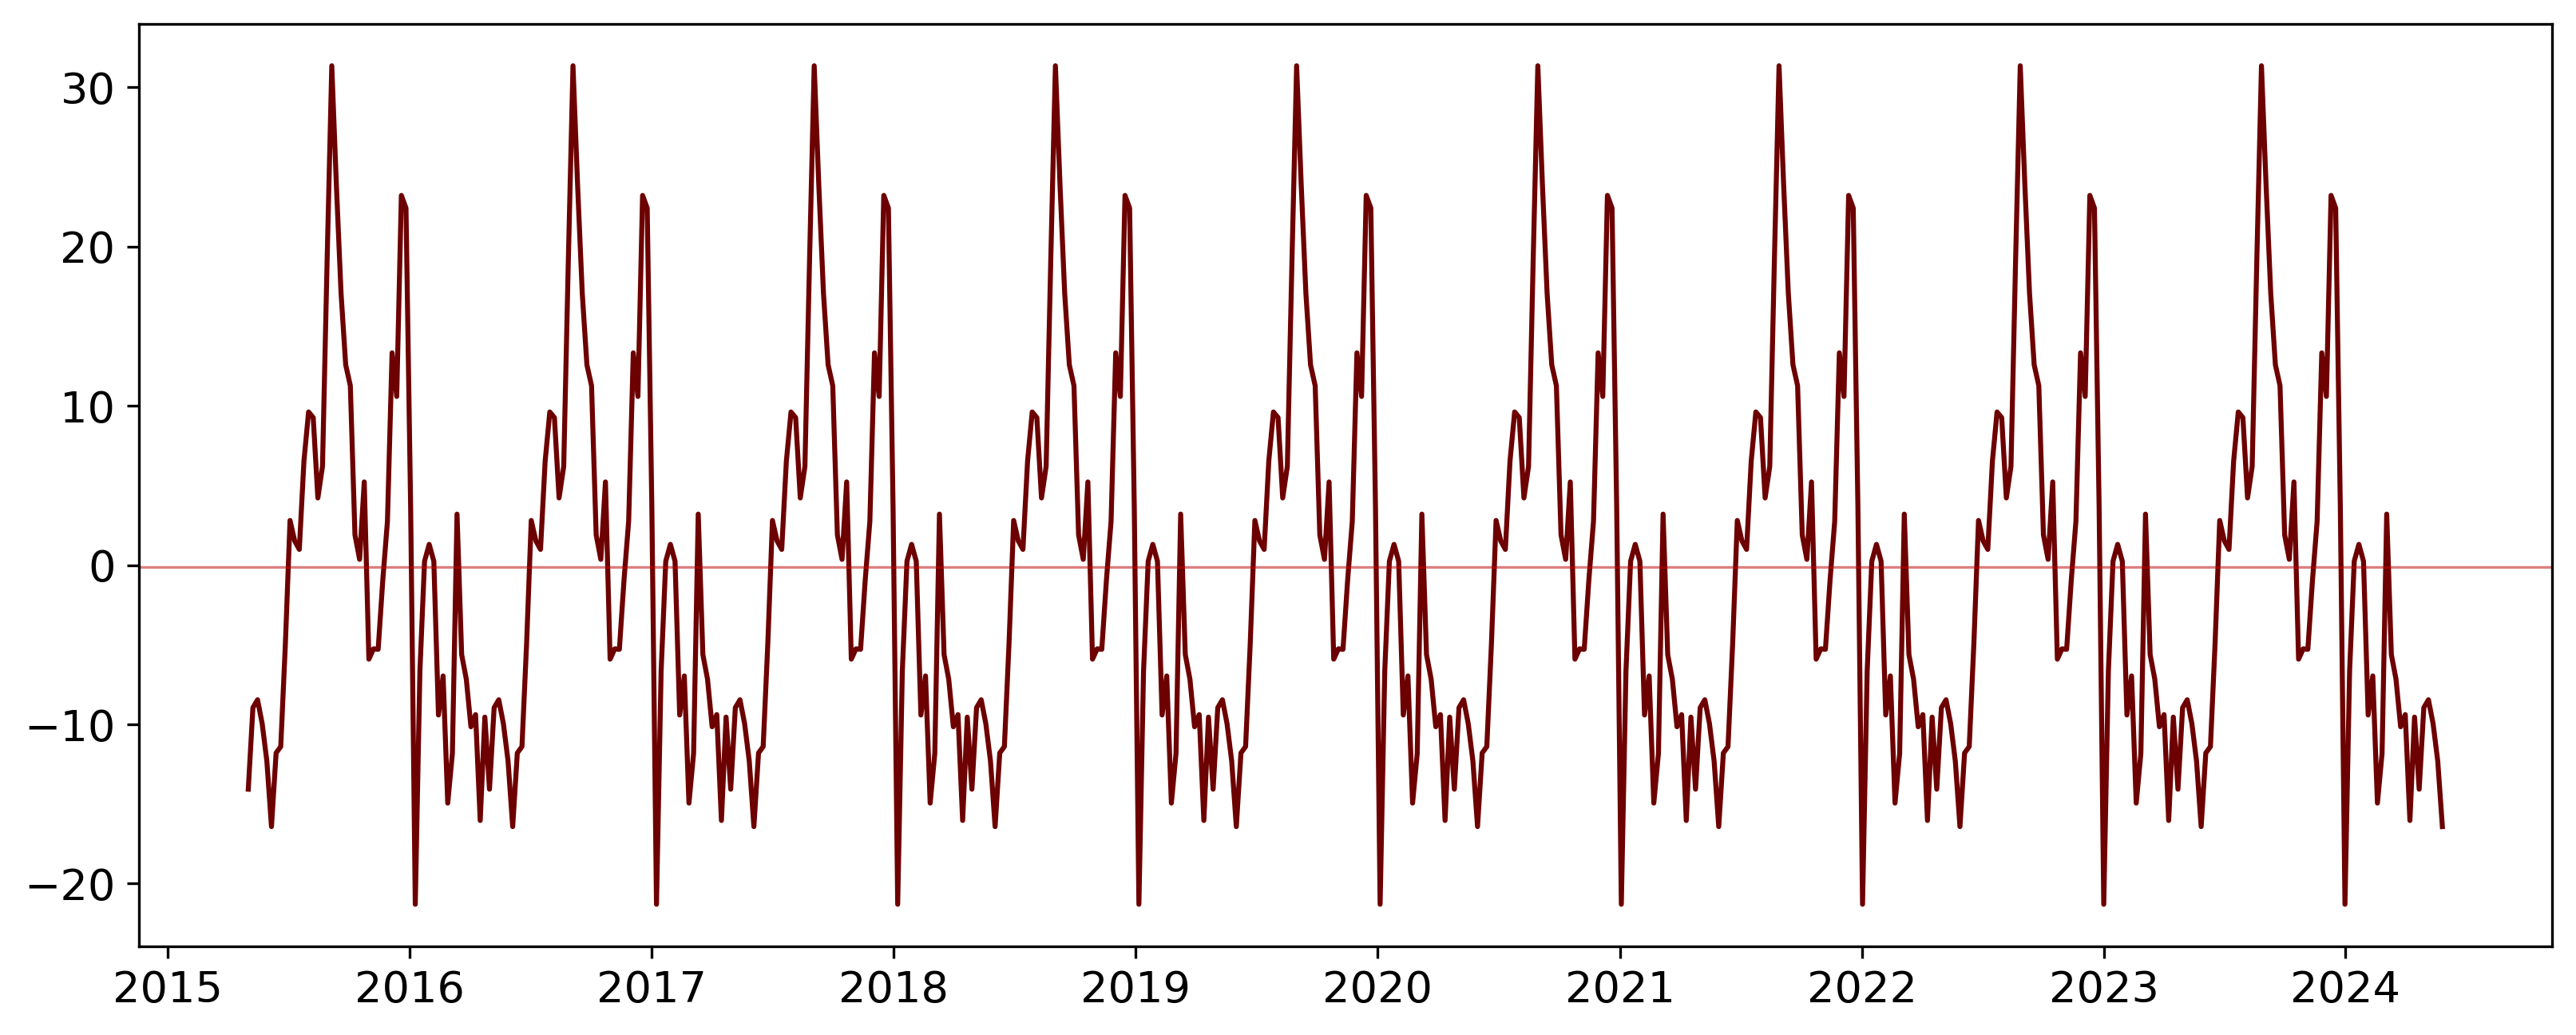

mean_Prices_GER_weekly_seasonal: -0.14803449232621924


In [201]:
mean_Prices_GER_weekly_seasonal = np.mean(Prices_GER_weekly['Seasonal_adjusted'])


plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Seasonal_adjusted'], label = 'Seasonal Germany_Luxembourg', color = '#6d0000')




plt.axhline(y=mean_Prices_GER_weekly_seasonal,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')


#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

print(f'mean_Prices_GER_weekly_seasonal: {mean_Prices_GER_weekly_seasonal}')

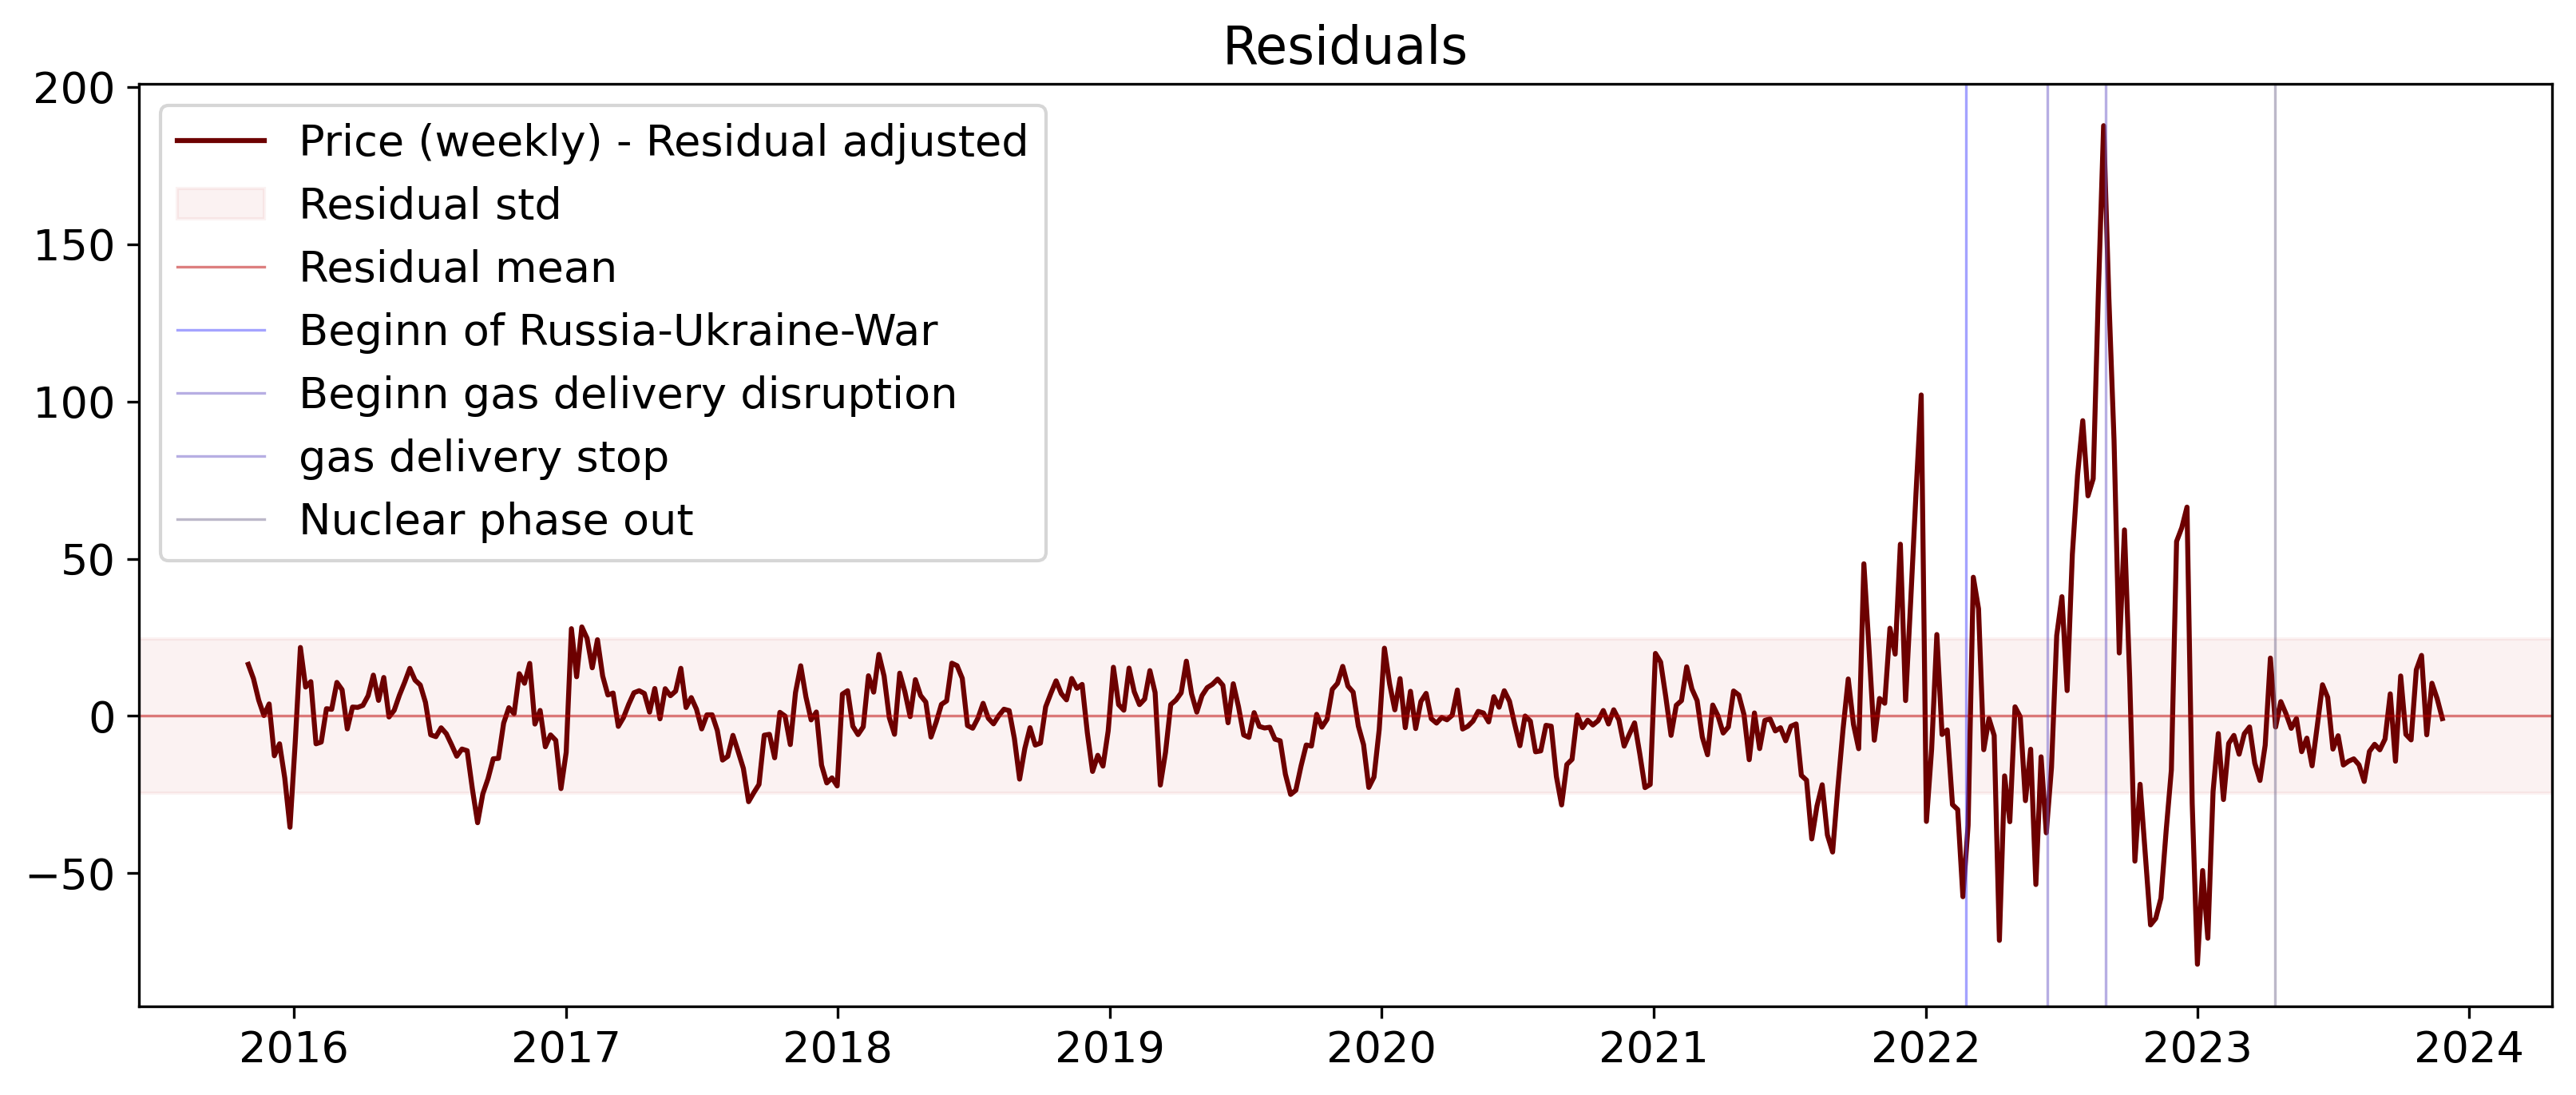

mean_Prices_GER_weekly_residual: 0.13
std_Prices_GER_weekly_residual: 24.51


In [202]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual_adjusted'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual_adjusted'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual_adjusted'], label = 'Price (weekly) - Residual adjusted', color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')



plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.title('Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {(mean_Prices_GER_weekly_residual).round(2)}')
print(f'std_Prices_GER_weekly_residual: {(std_Prices_GER_weekly_residual).round(2)}')

### Generation + Import & Consumption + Export

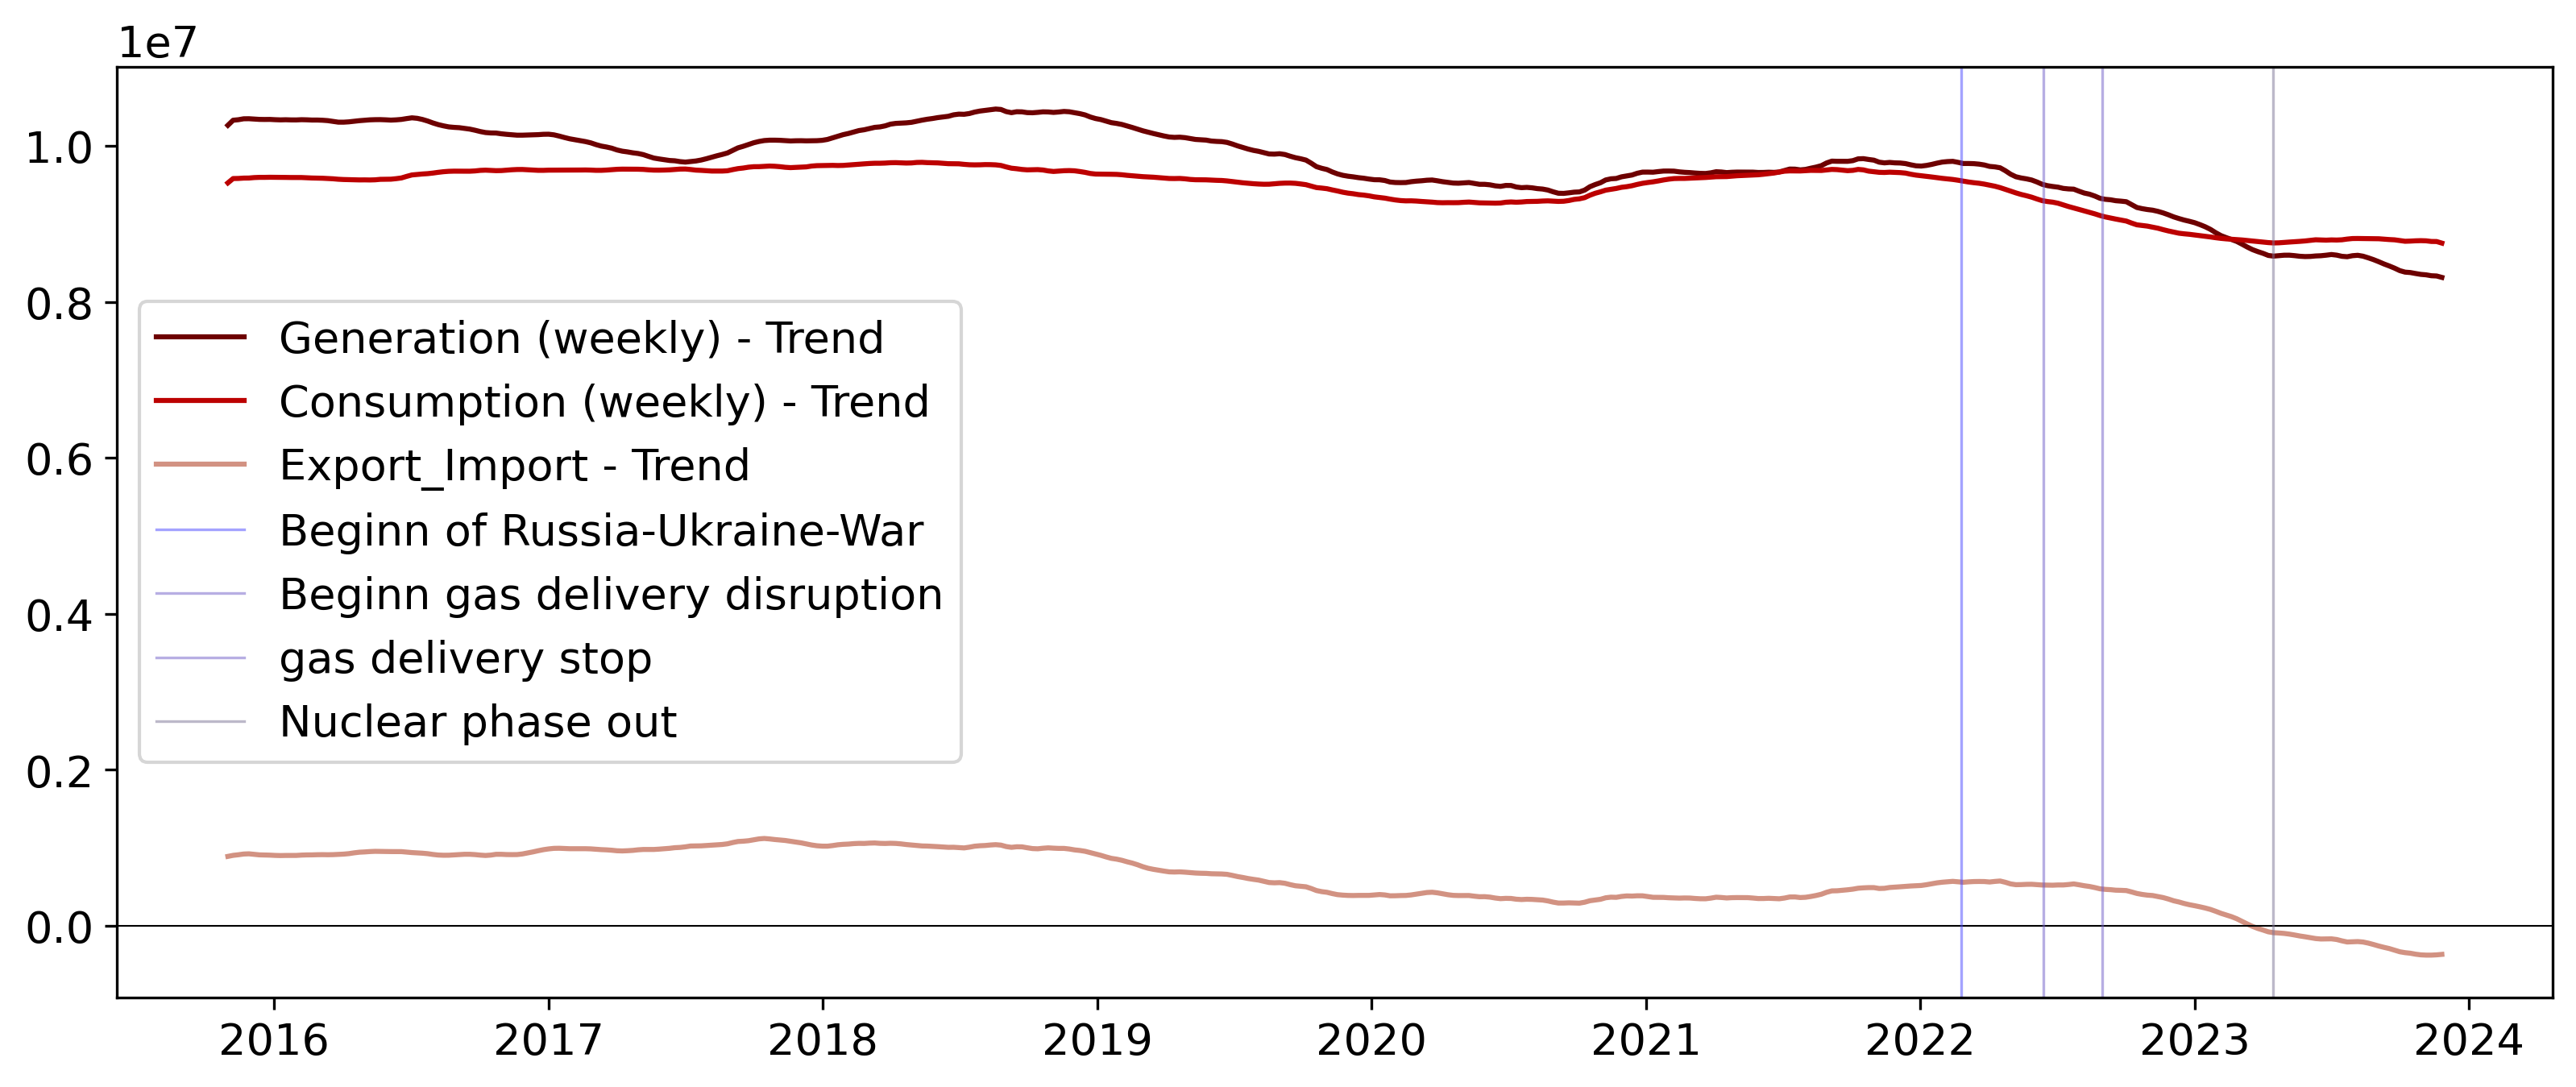

In [184]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Generation_weekly['Trend'], label = 'Generation (weekly) - Trend ', color = '#6d0000')
plt.plot(Consumption_weekly['Trend'], label = 'Consumption (weekly) - Trend',color='#bc0000')
plt.plot(Export_Import_weekly['Trend'], label = 'Export_Import - Trend', color = '#d29282')
plt.axhline(y=0,color = '#000000', linewidth = 0.5)

plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


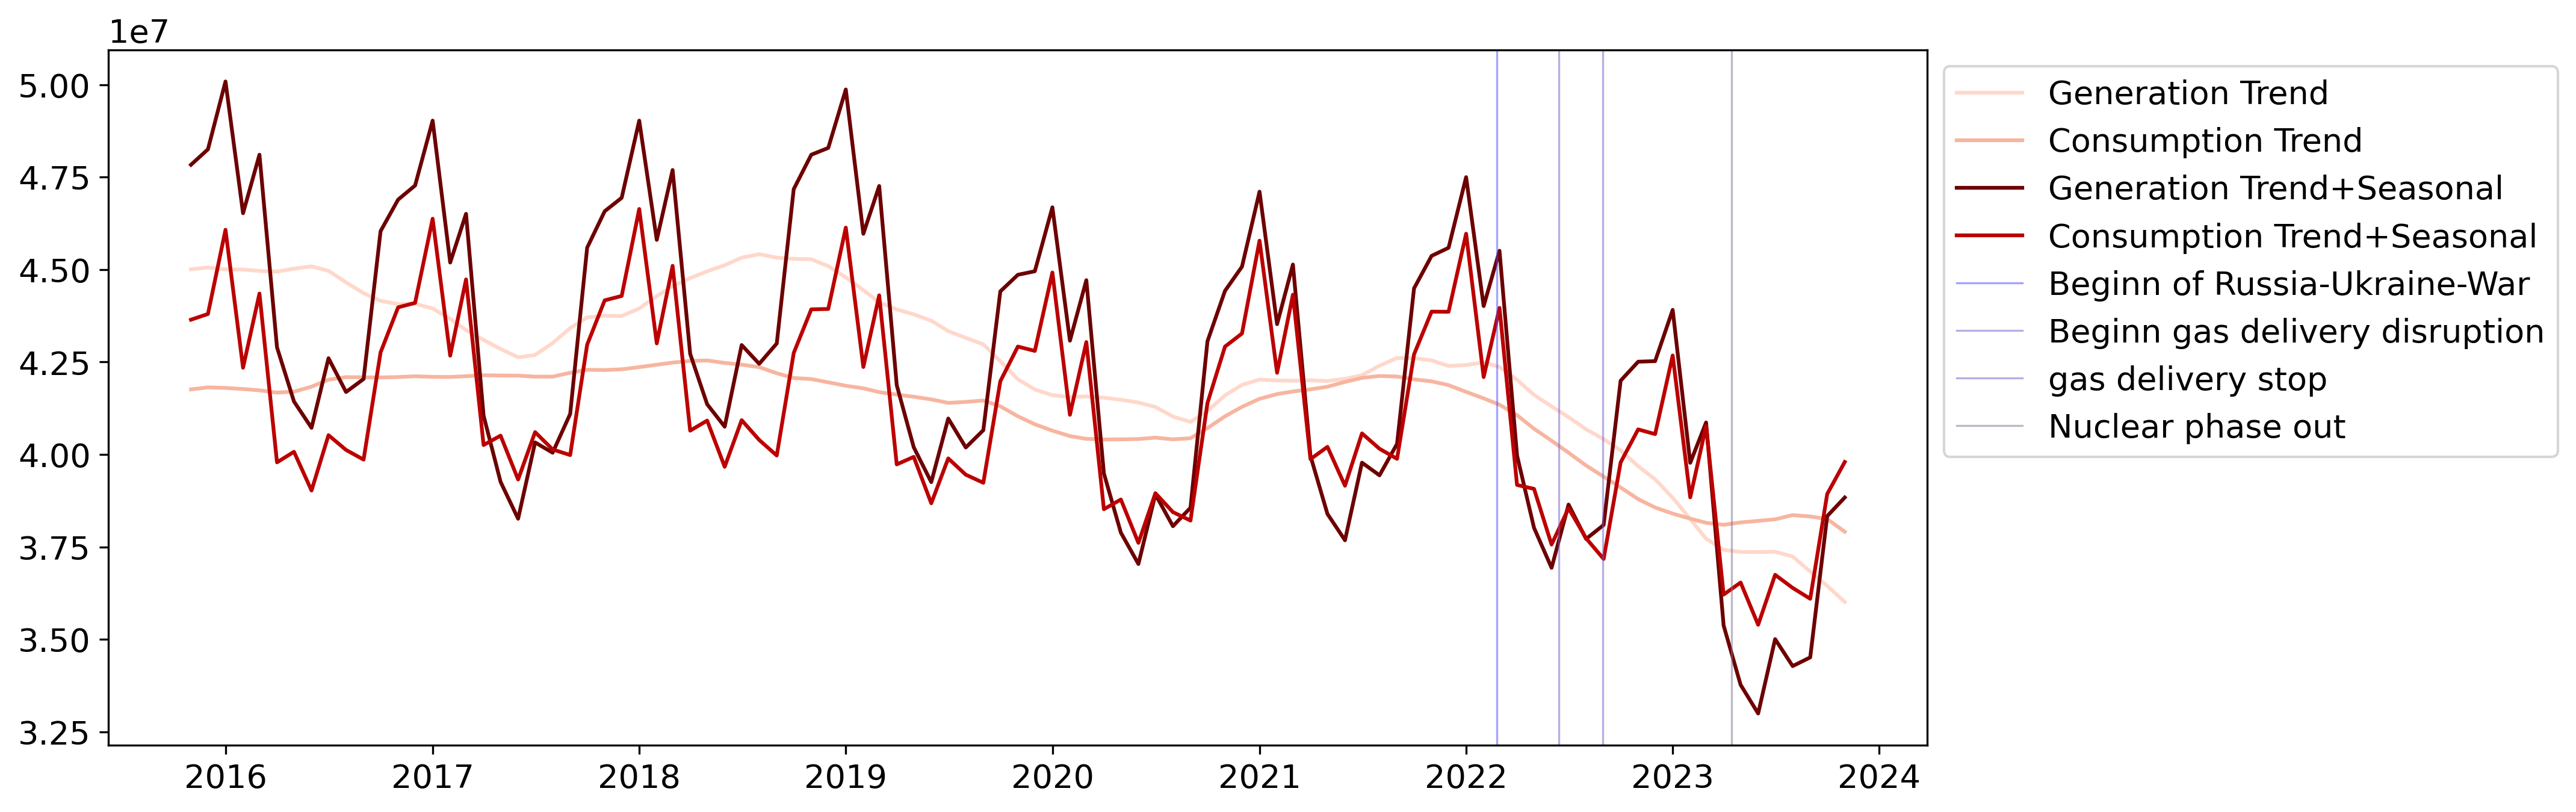

In [185]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Generation_monthly['Trend'], color= '#ffd8cb', label='Generation Trend')
plt.plot(Consumption_monthly['Trend'], color= '#f7b59f', label='Consumption Trend')
plt.plot(Generation_monthly['Trend+Seasonal'],color='#6d0000', label='Generation Trend+Seasonal')
plt.plot(Consumption_monthly['Trend+Seasonal'],color='#bc0000', label='Consumption Trend+Seasonal')


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

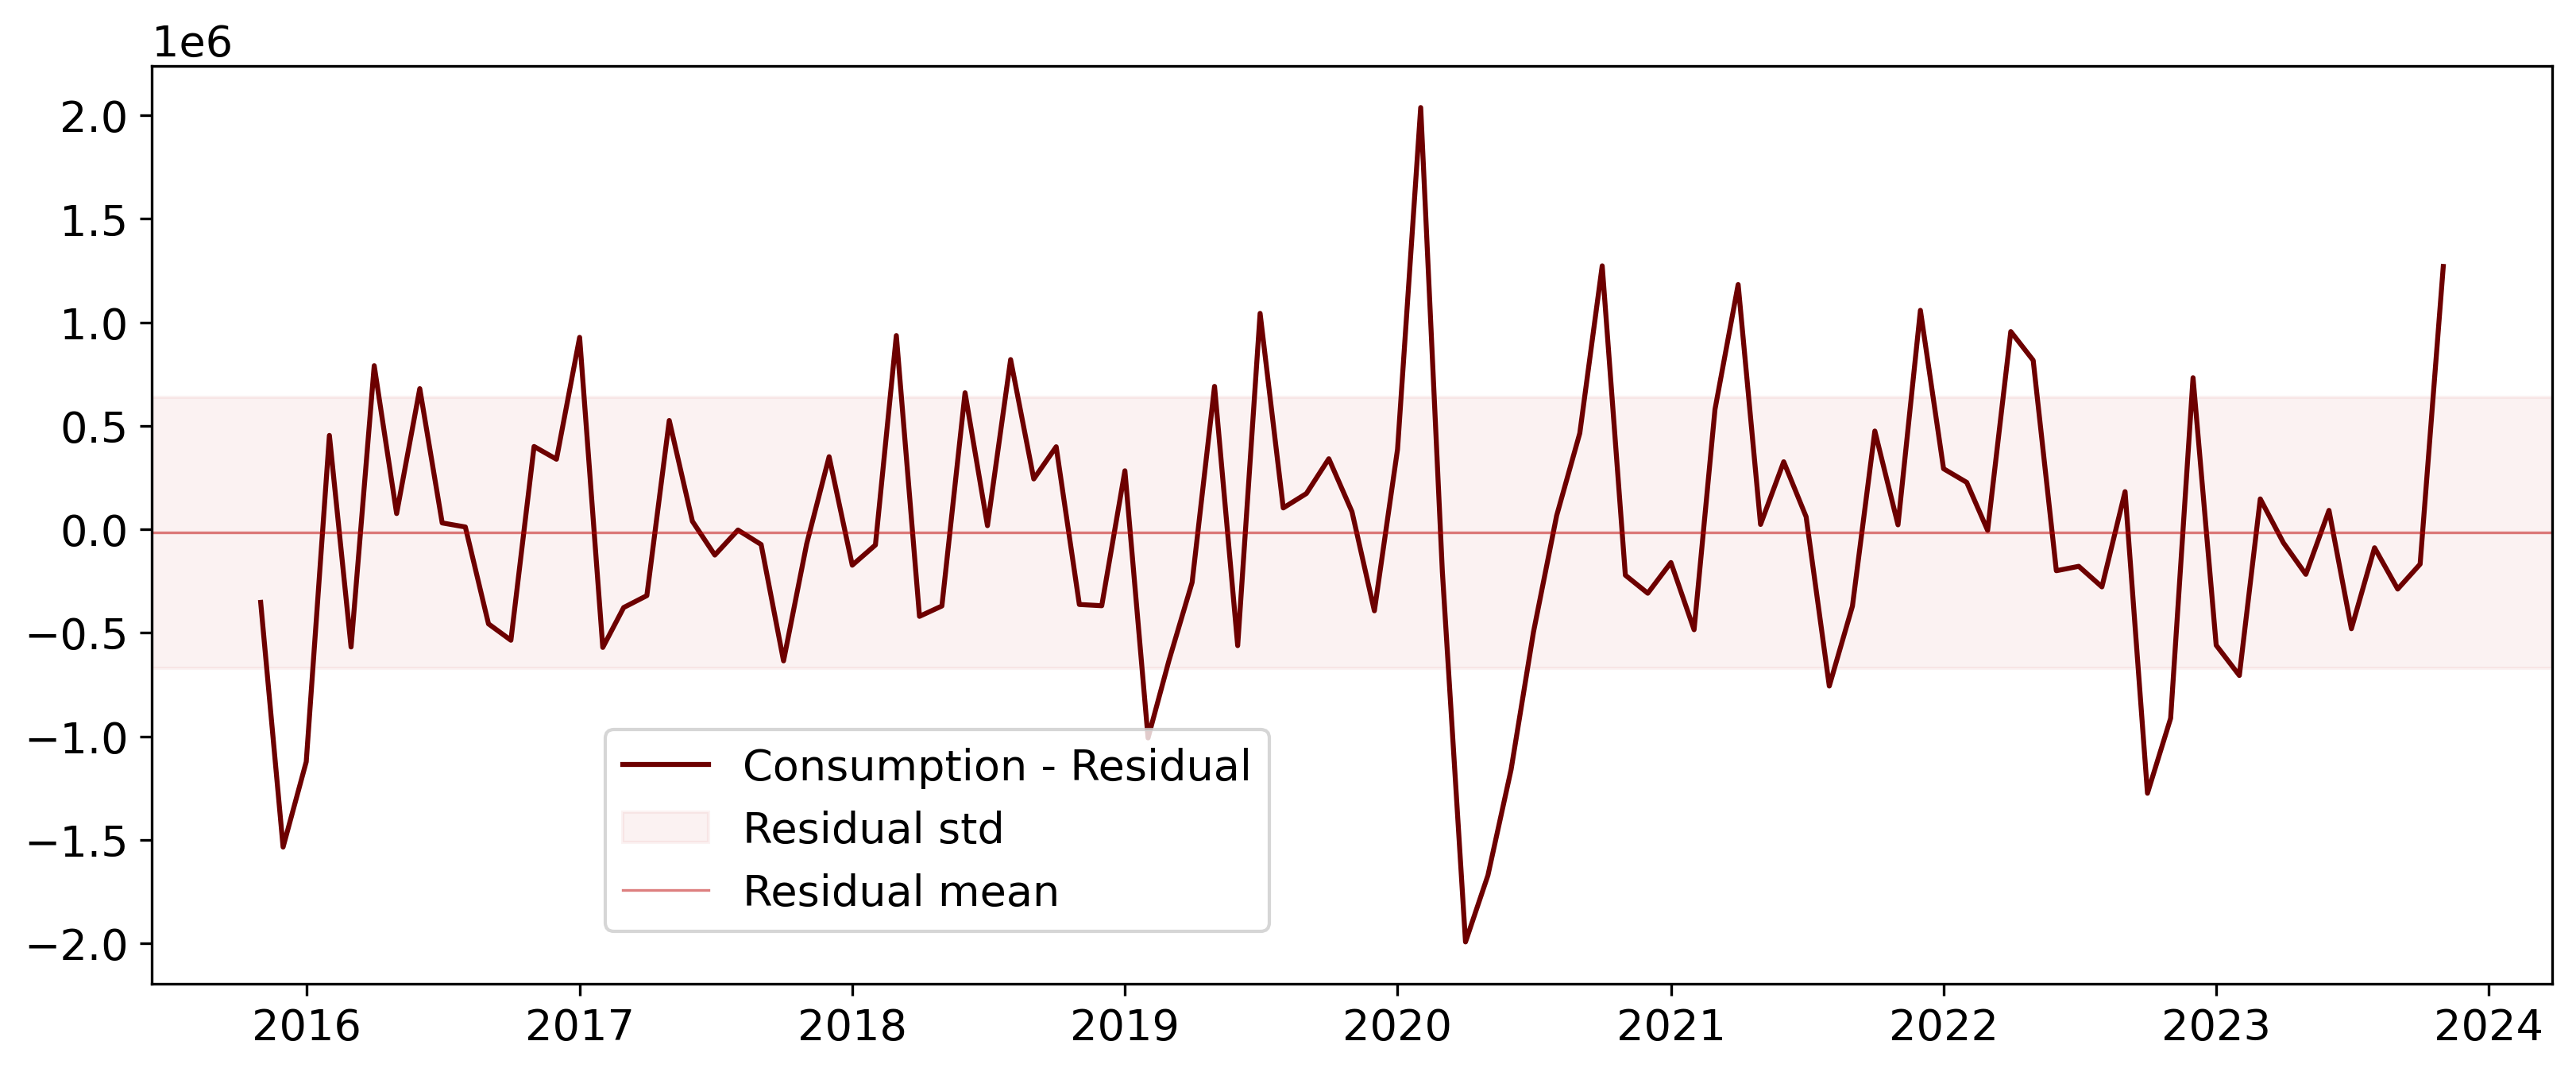

In [186]:
mean_Consumption_monthly_residual = np.mean(Consumption_monthly['Residual'])
std_Consumption_monthly_residual = np.std(Consumption_monthly['Residual'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Consumption_monthly['Residual'], label = 'Consumption - Residual', color = '#6d0000')
plt.axhspan(ymin=mean_Consumption_monthly_residual-std_Consumption_monthly_residual,ymax=mean_Consumption_monthly_residual+std_Consumption_monthly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Consumption_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')




plt.legend(bbox_to_anchor=(0.18,0.3))
plt.show()

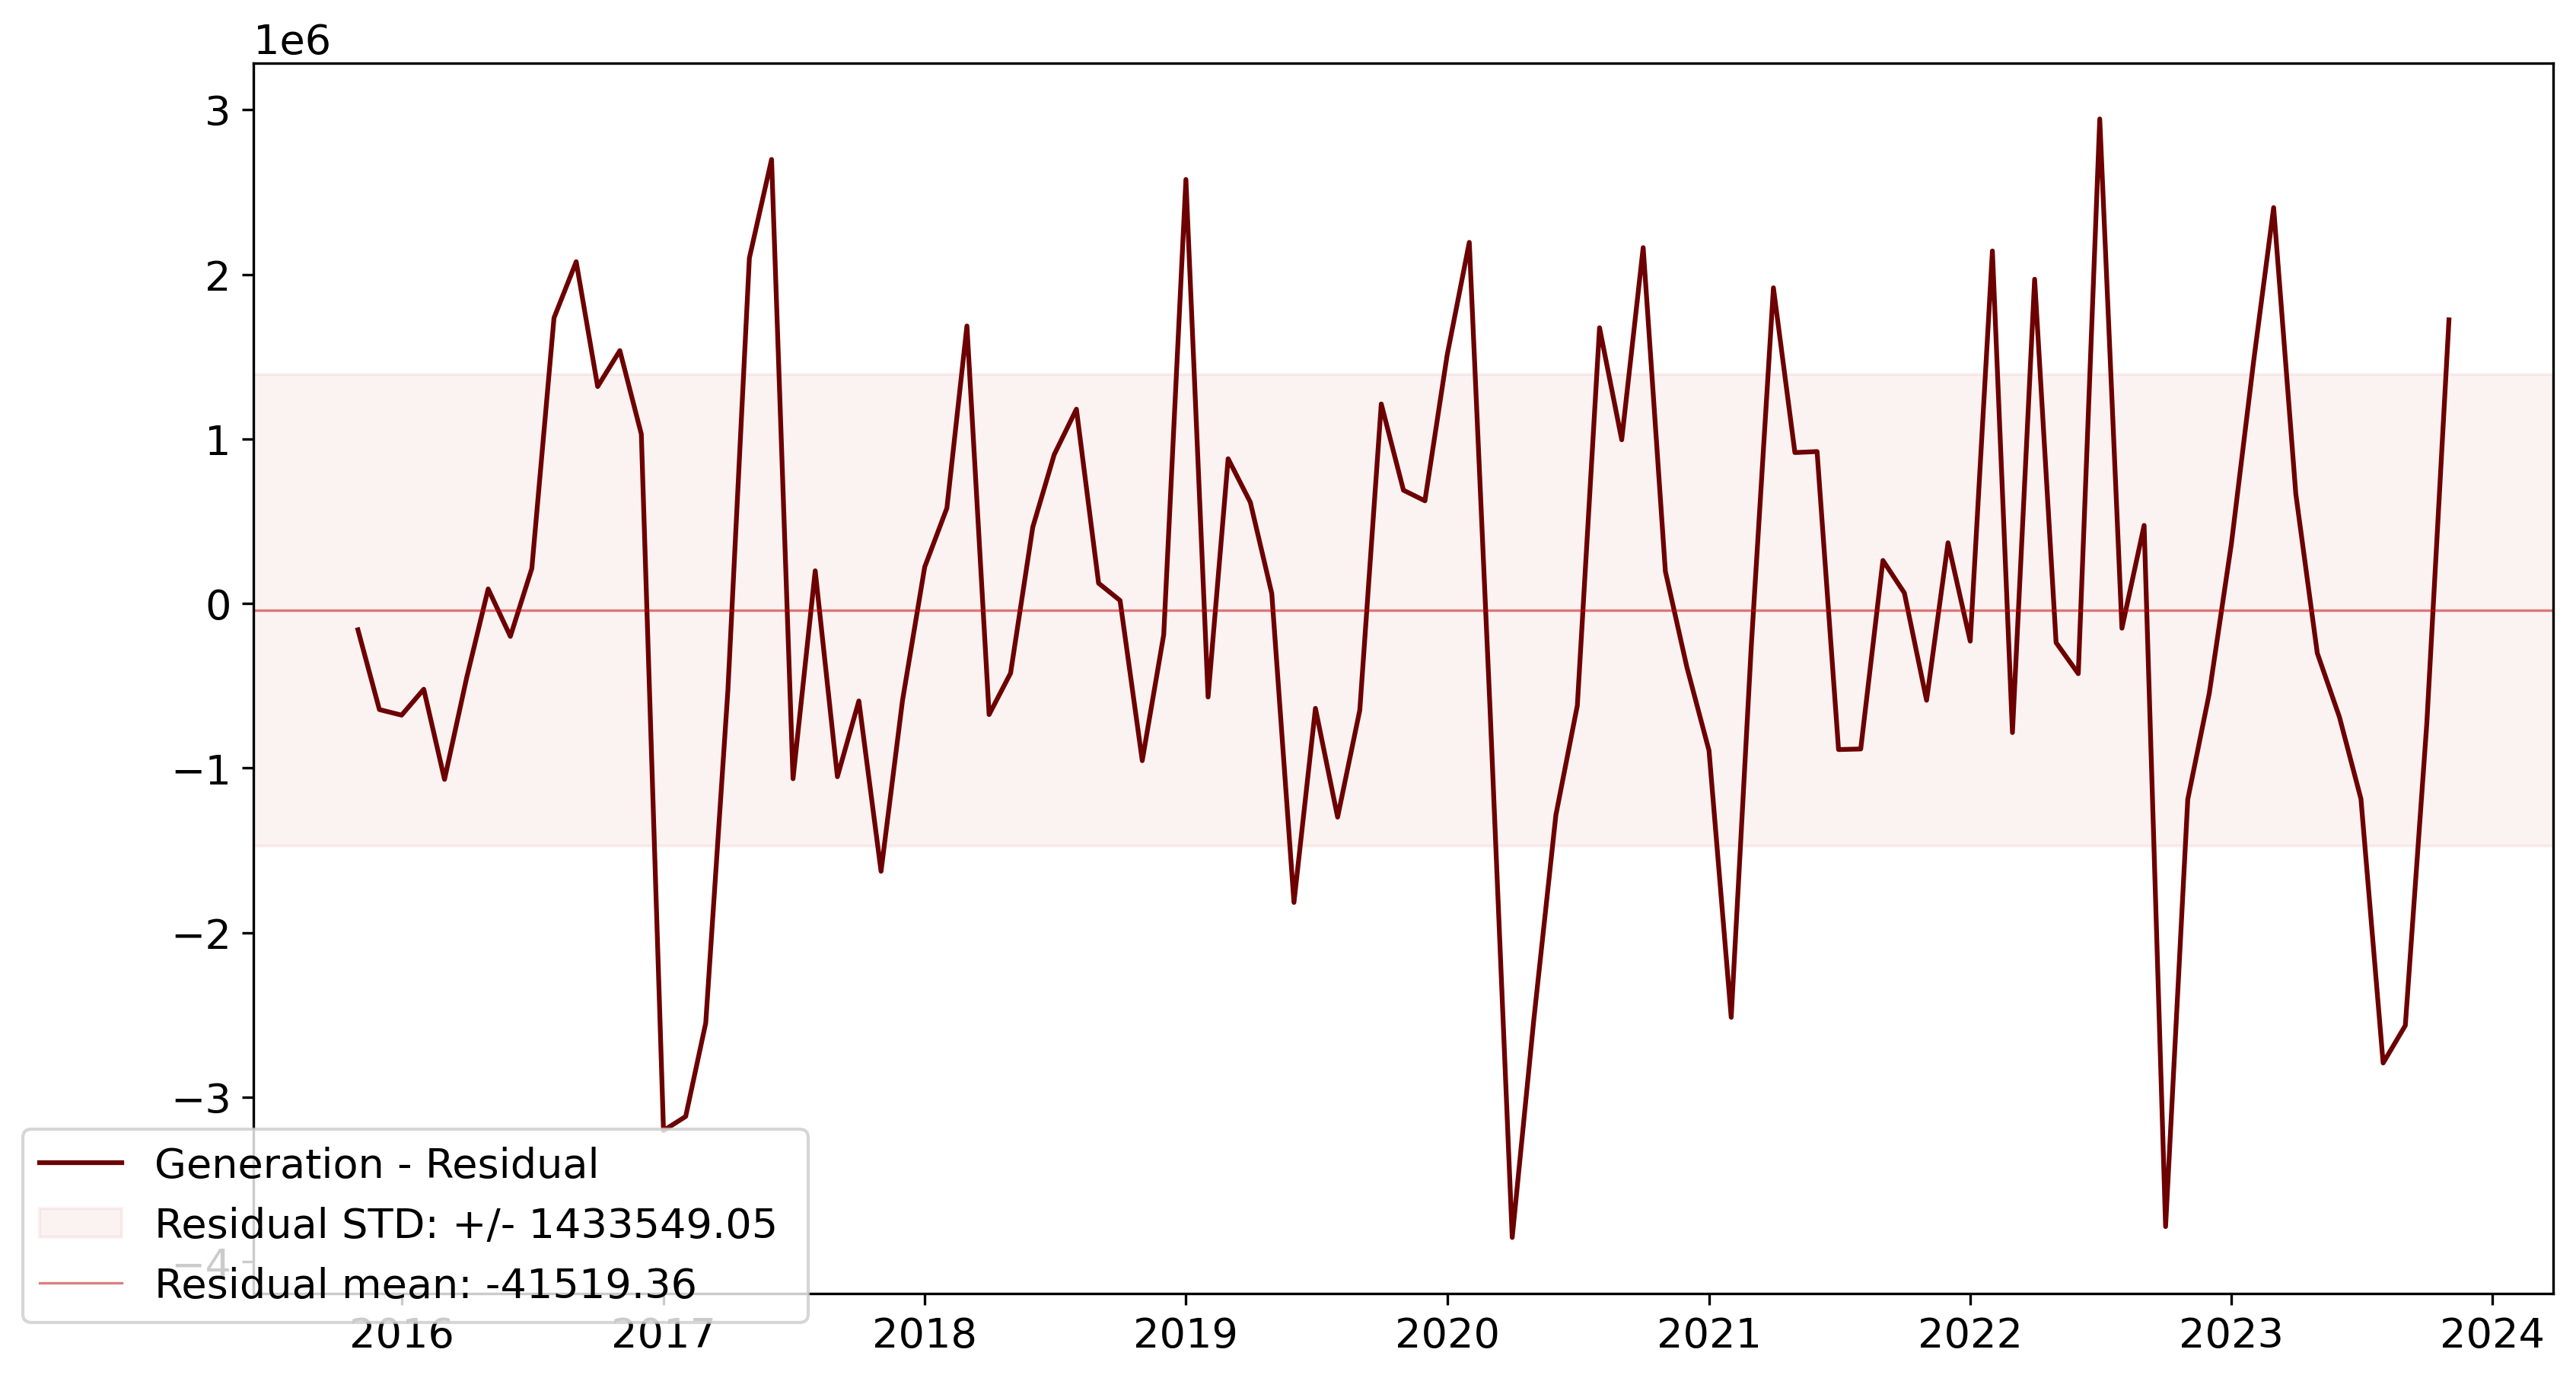

In [187]:
mean_Generation_monthly_residual = np.mean(Generation_monthly['Residual'])
std_Generation_monthly_residual = np.std(Generation_monthly['Residual'])


plt.figure(figsize= (13,7), dpi = 300)

plt.plot(Generation_monthly['Residual'], label = 'Generation - Residual', color = '#6d0000')
plt.axhspan(ymin=mean_Generation_monthly_residual-std_Generation_monthly_residual,ymax=mean_Generation_monthly_residual+std_Generation_monthly_residual, alpha = 0.05, label = f'Residual STD: +/- {(std_Generation_monthly_residual).round(2)} ',color = '#bc0000')
plt.axhline(y=mean_Generation_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = f'Residual mean: {(mean_Generation_monthly_residual).round(2)}')





plt.legend(bbox_to_anchor=(0.25, 0.15))
plt.show()

In [188]:
Import_reversed = Export_Import
Import_reversed['Import_sum'] = Import_reversed['Import_sum']* (-1) 

In [189]:
Export_monthly = decomposition_df(Export_Import, 'Export_sum')
Import_monthly = decomposition_df(Import_reversed, 'Import_sum')
Export_weekly = decomposition_df(Export_Import, 'Export_sum','W')
Import_weekly = decomposition_df(Import_reversed, 'Import_sum','W')


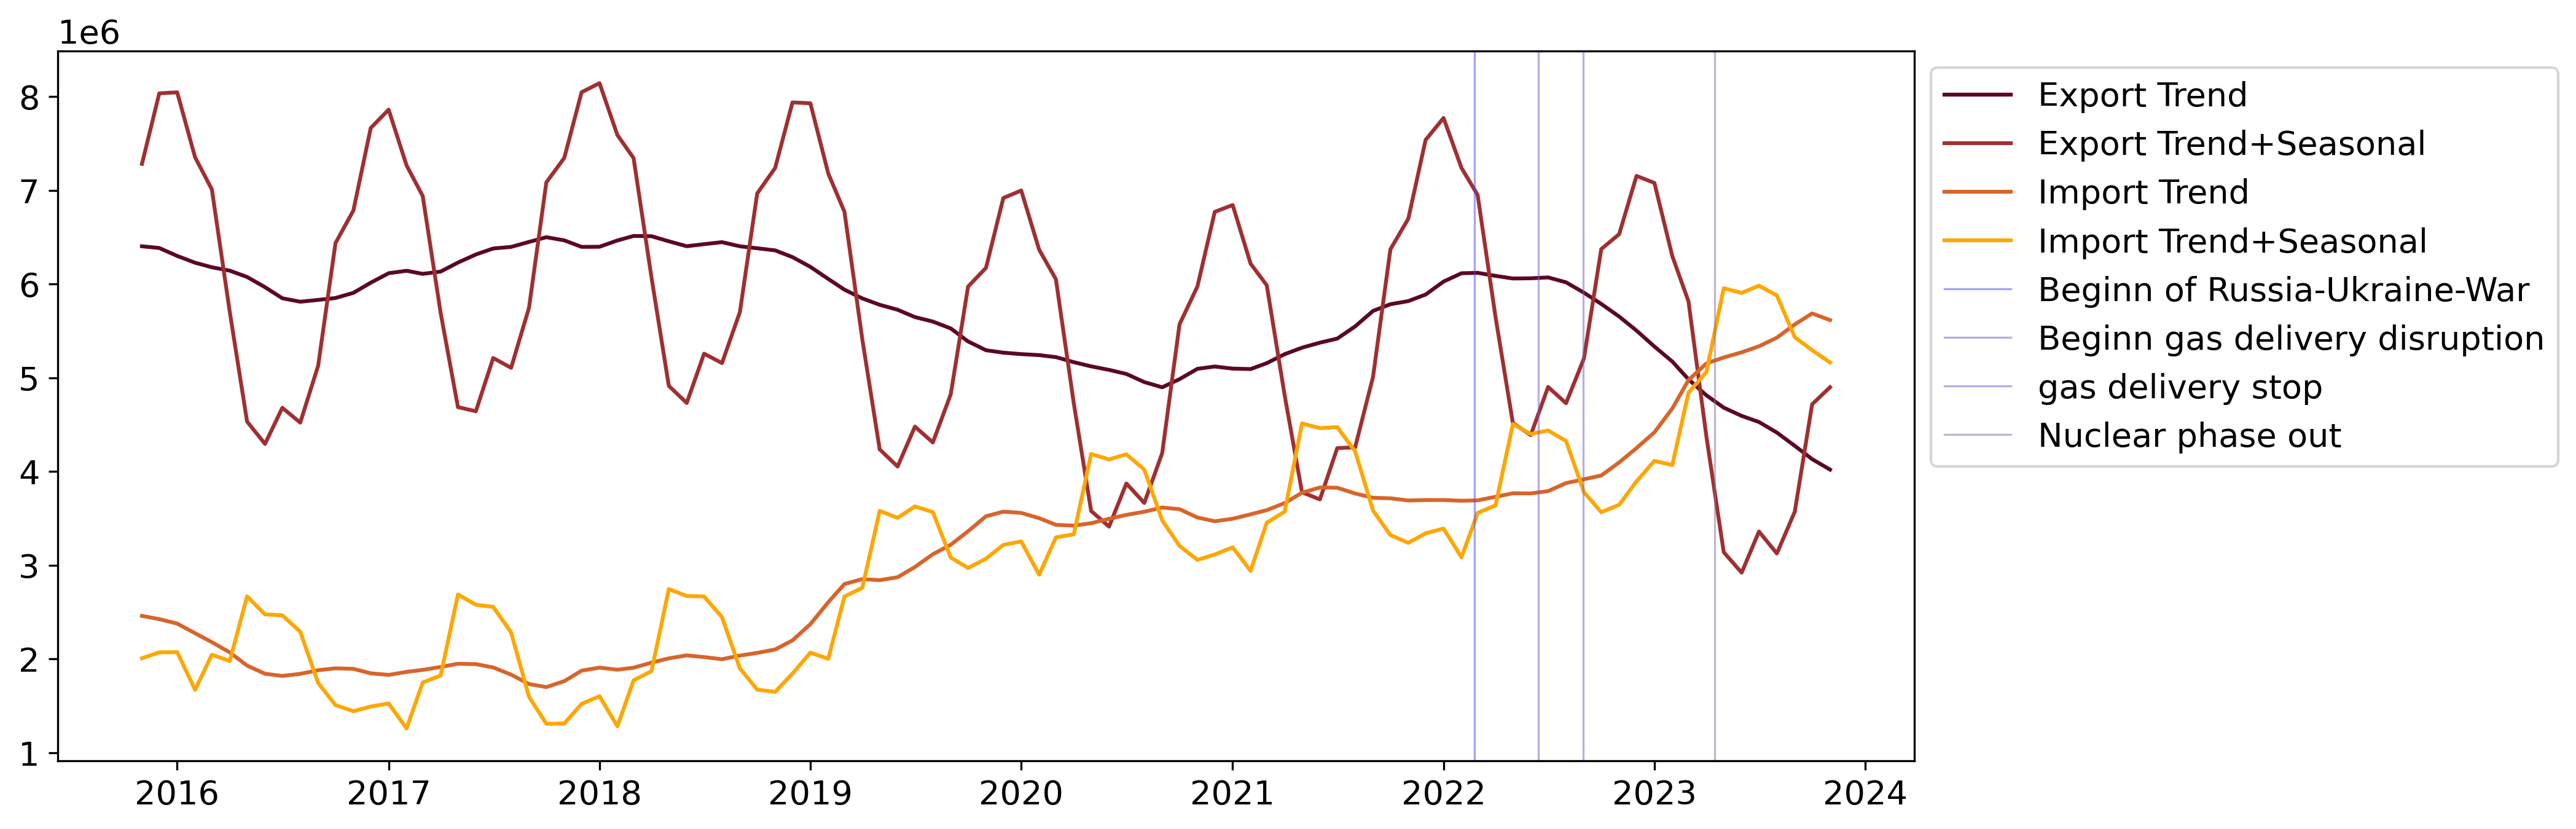

In [190]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_monthly['Trend'], color= '#5c0728', label='Export Trend')
plt.plot(Export_monthly['Trend+Seasonal'],color='#a02f31', label='Export Trend+Seasonal')
plt.plot(Import_monthly['Trend'], color= '#d9642a', label='Import Trend')
plt.plot(Import_monthly['Trend+Seasonal'],color='#ffa600', label='Import Trend+Seasonal')




plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

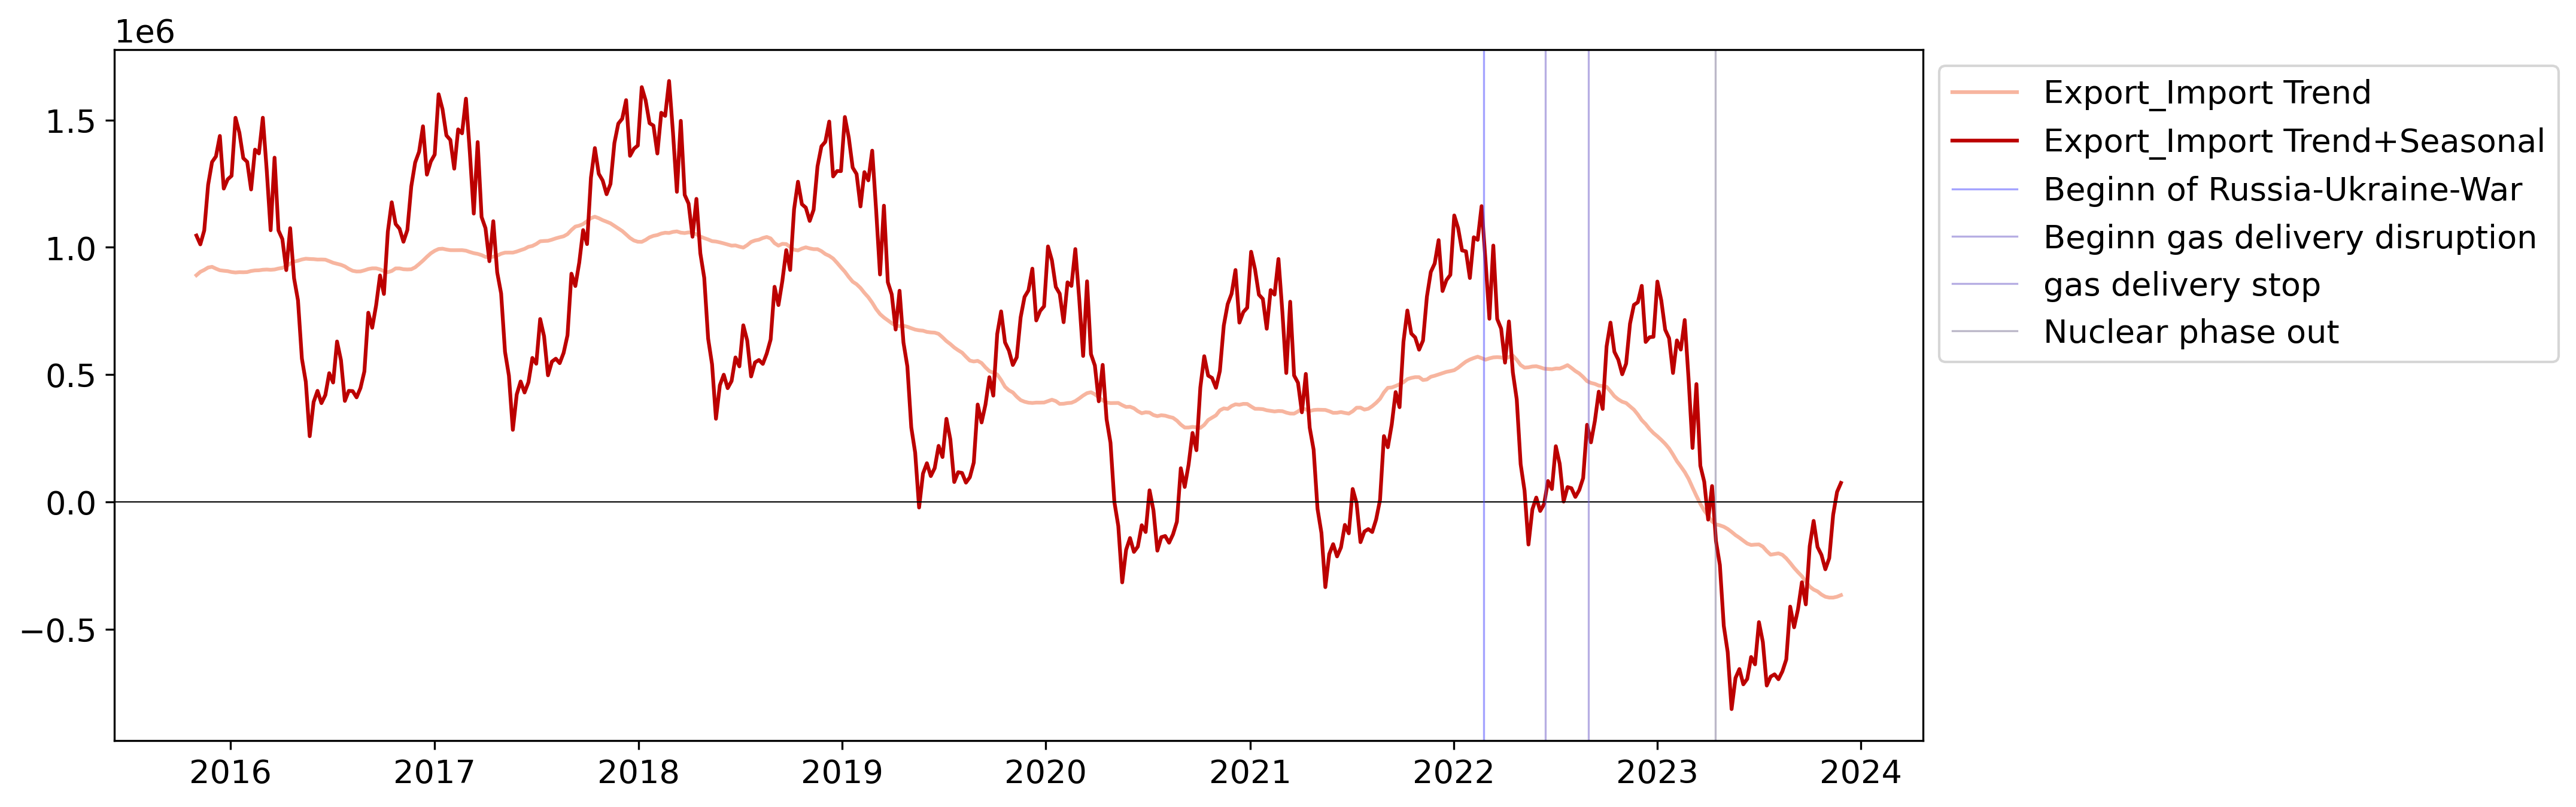

In [191]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_Import_weekly['Trend'], color= '#f7b59f', label='Export_Import Trend')
plt.plot(Export_Import_weekly['Trend+Seasonal'],color='#bc0000', label='Export_Import Trend+Seasonal')

plt.axhline(y=0,color = '#000000', linewidth = 0.5)


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [192]:
Generation_monthly.shape

(109, 5)